### PTID-CDS-JUN22-1329

### PRCP-1019-ConcreteStren

### About Dataset

#### Concrete is the most used material for construction in the world. There are some components that should be combined
#### to make the concrete.These components can affect the compressive strength of the concrete.Given are the variable name,
#### variable type, the measurement unit and a brief description.
* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* Age -- quantitative -- Day (1~365) -- Input Variable
* Concrete compressive strength -- quantitative -- MPa -- Output Variable

In [77]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [78]:
data=pd.read_csv('concrete.csv')
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Basic Checks

In [79]:
data.shape

(1030, 9)

In [80]:
# Insights: there are 1030 rows and 9 columns in this dataset

In [81]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [82]:
data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [84]:
# Insights:There is no null value present in the dataset.Only age is integer type rest of columns are float type.

In [85]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [86]:
# insights:Minimum value in slag,ash,superplastic is zero and age is 1.50% data has ash value zero

### Exploratory Data Analysis

### Univariate Analysis

                                             |                                             | [  0%]   00:00 ->…


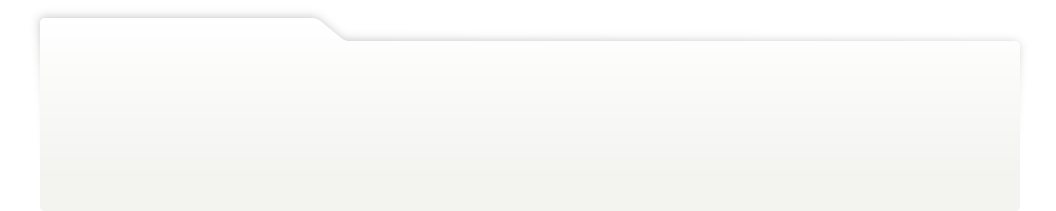
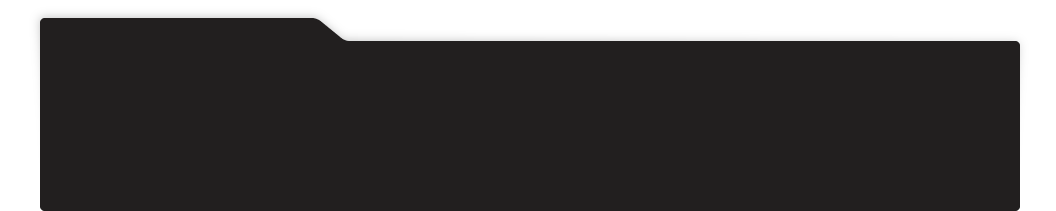
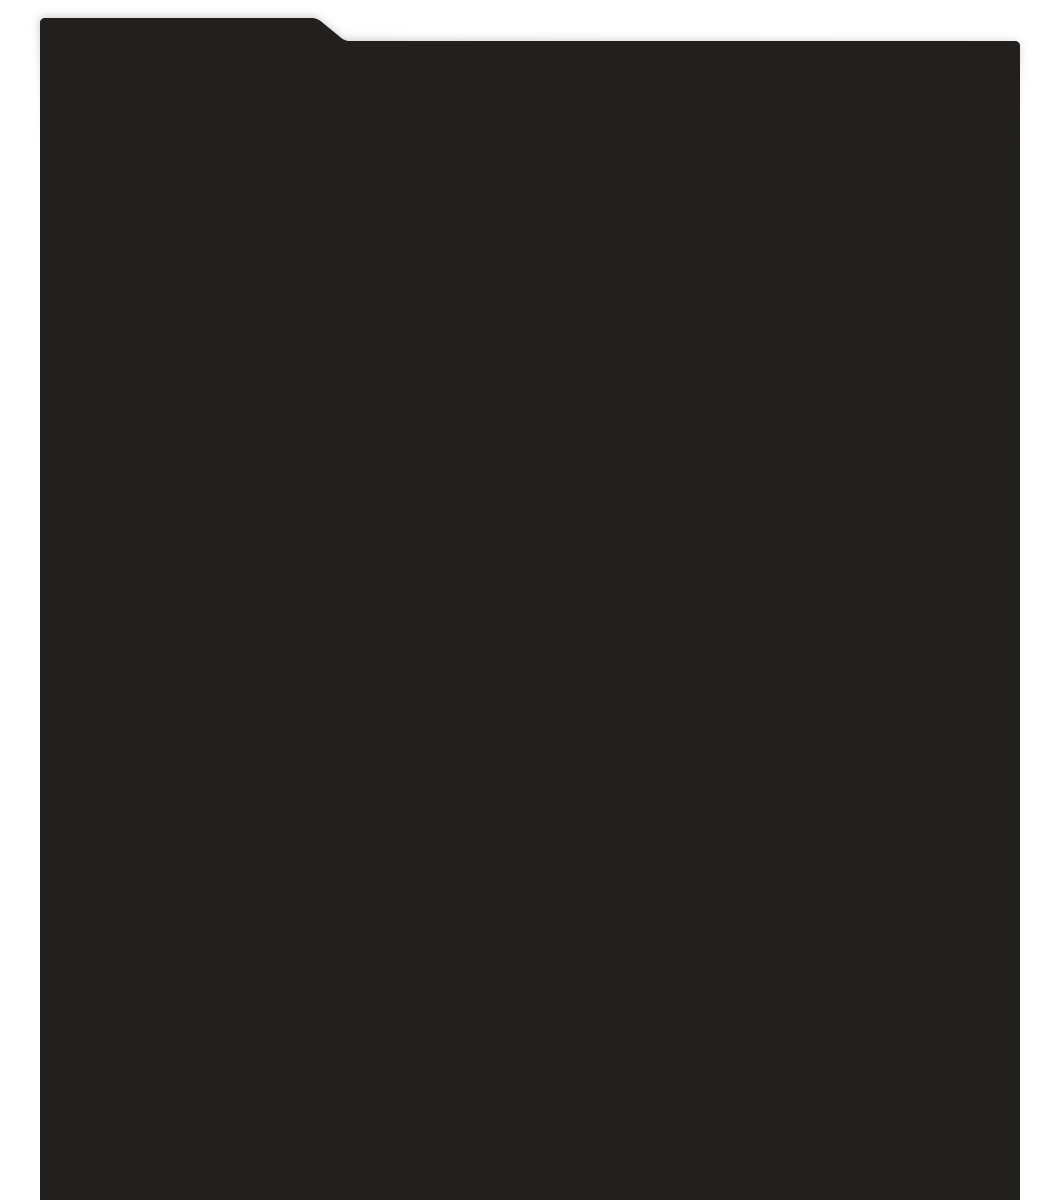
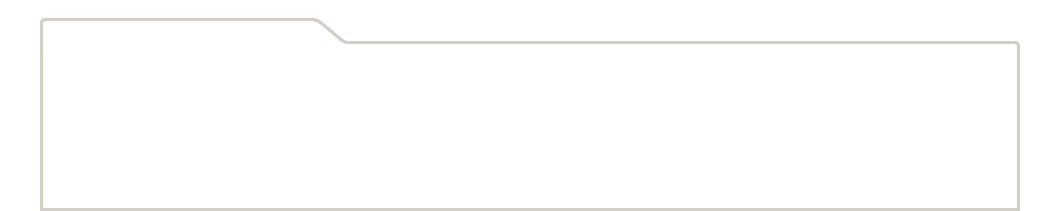
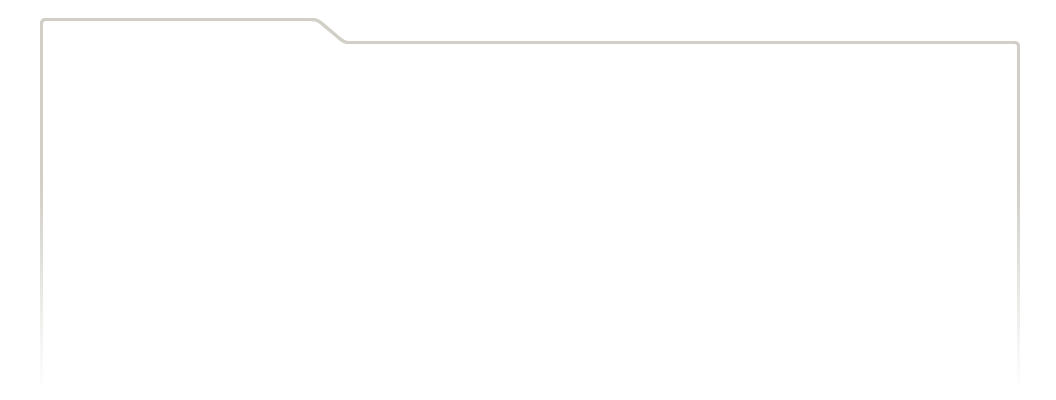
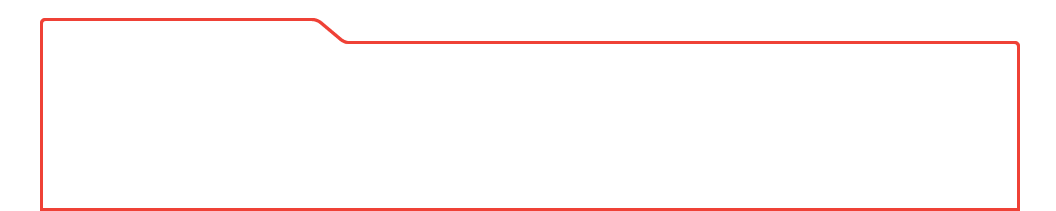
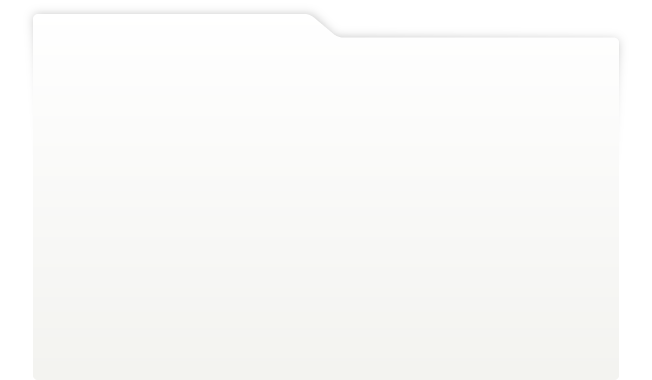
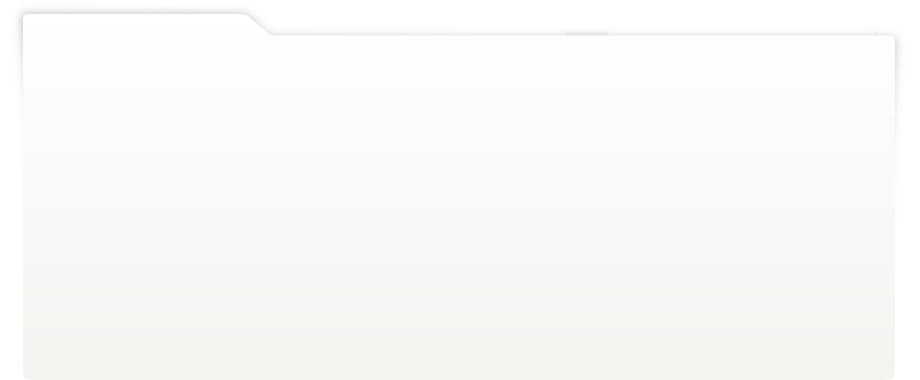
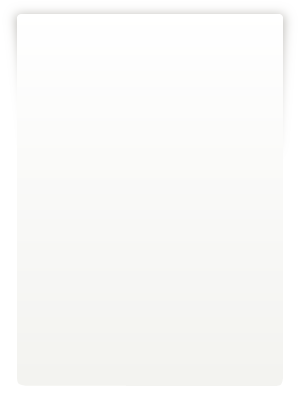
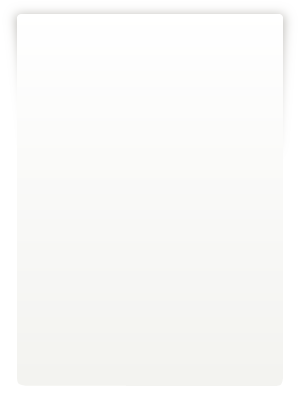
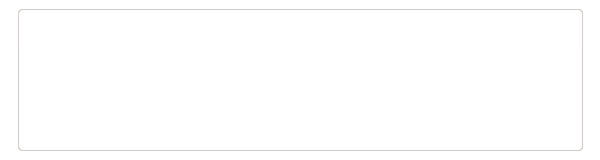
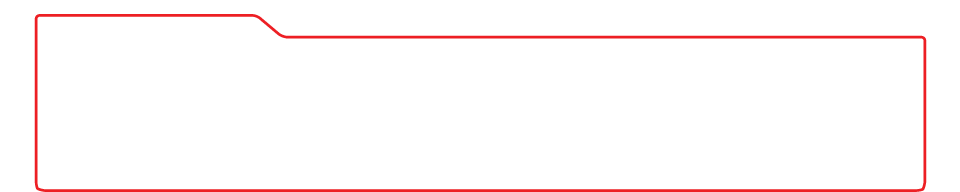
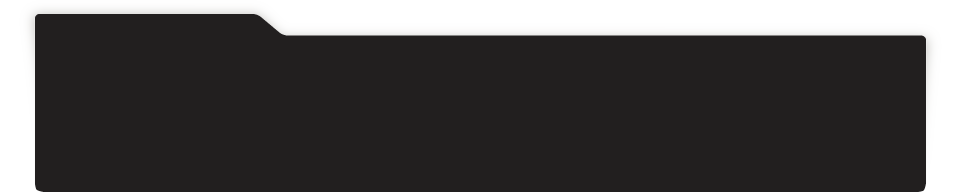
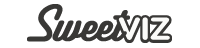
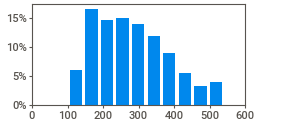
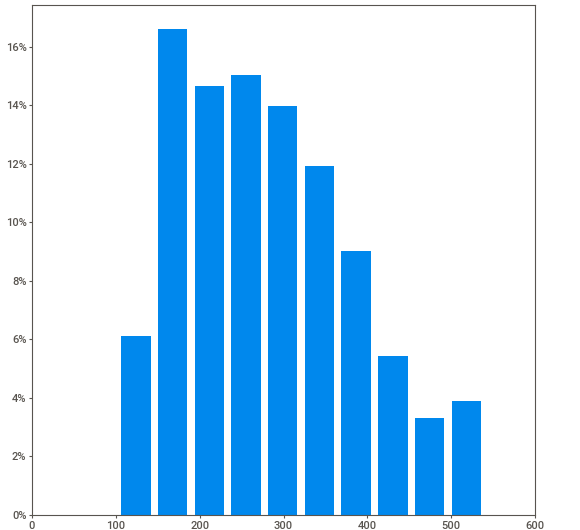
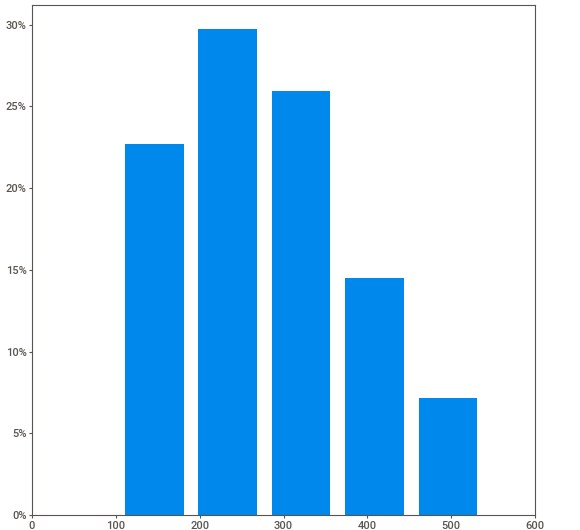
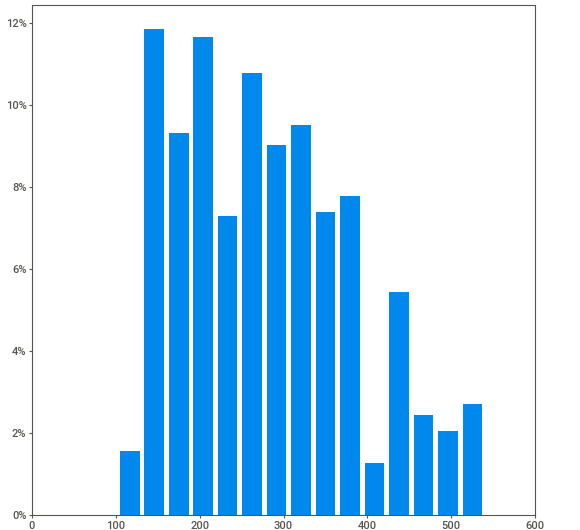
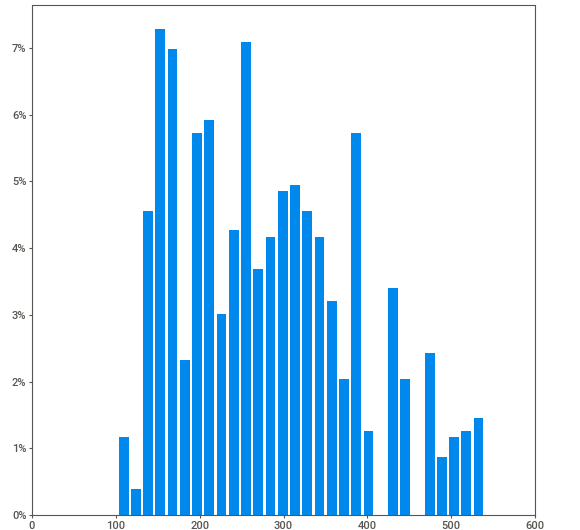
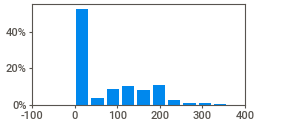
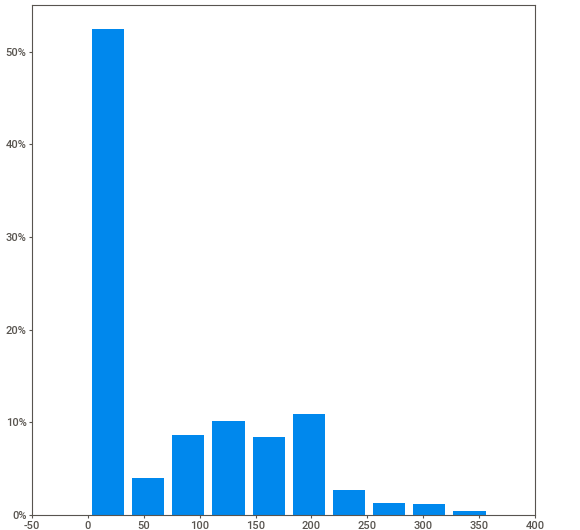
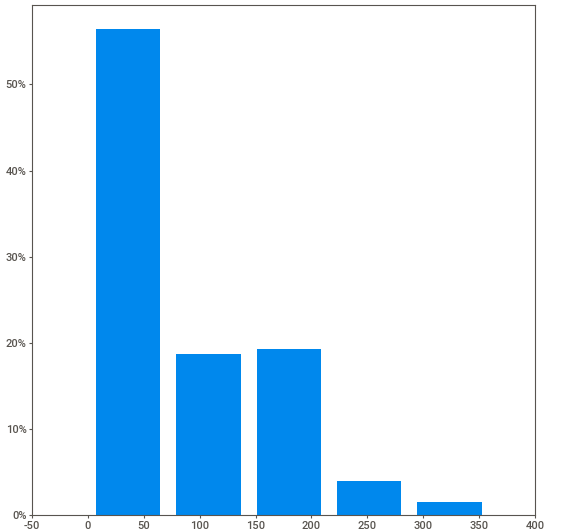
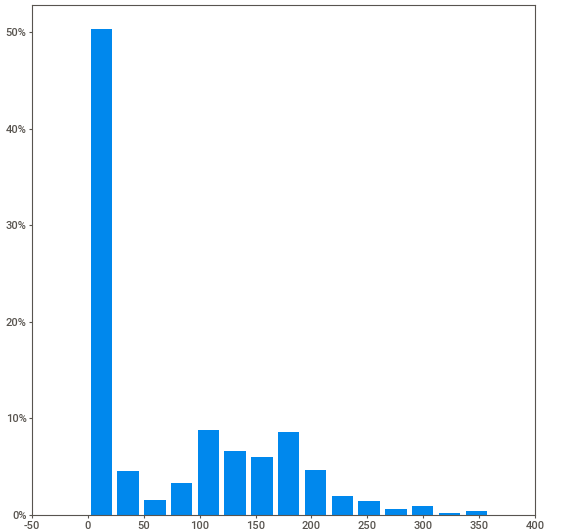
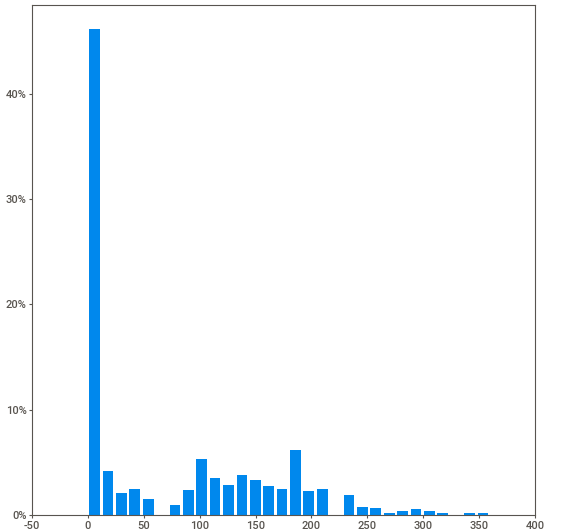
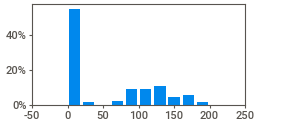
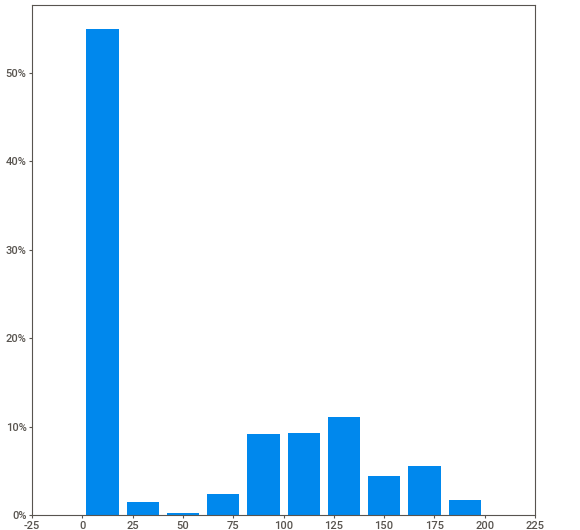
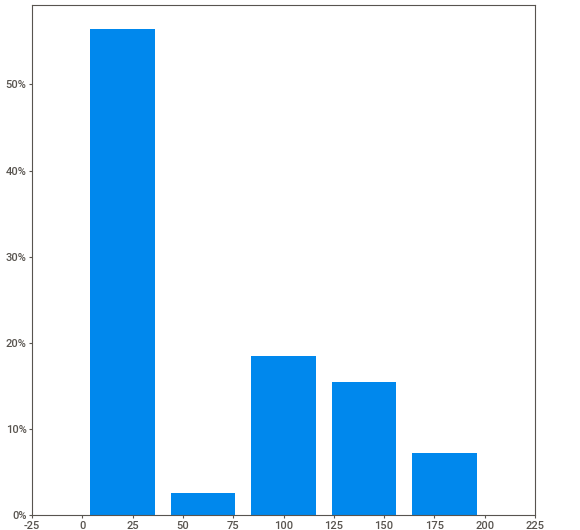
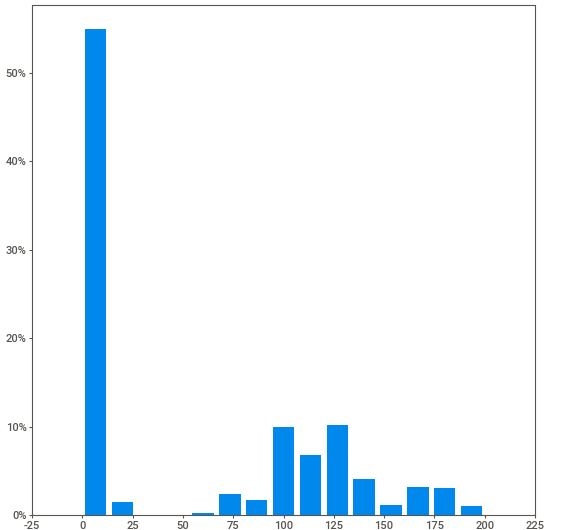
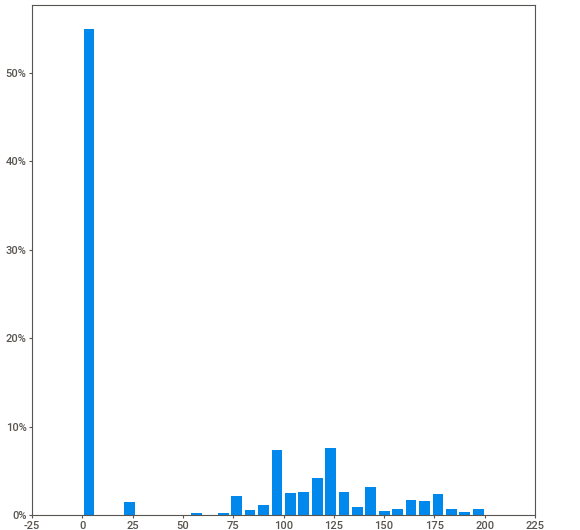
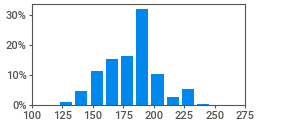
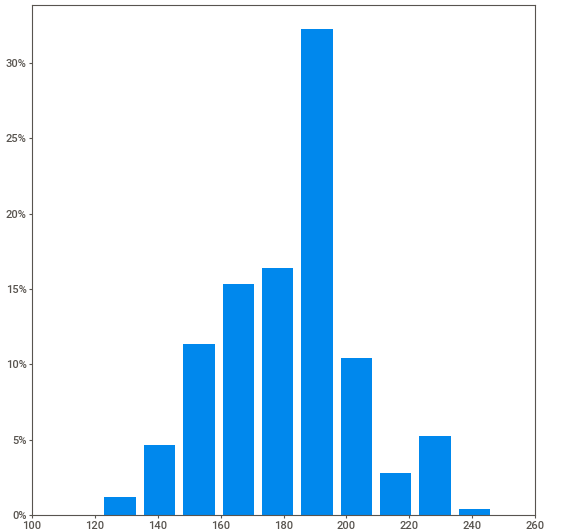
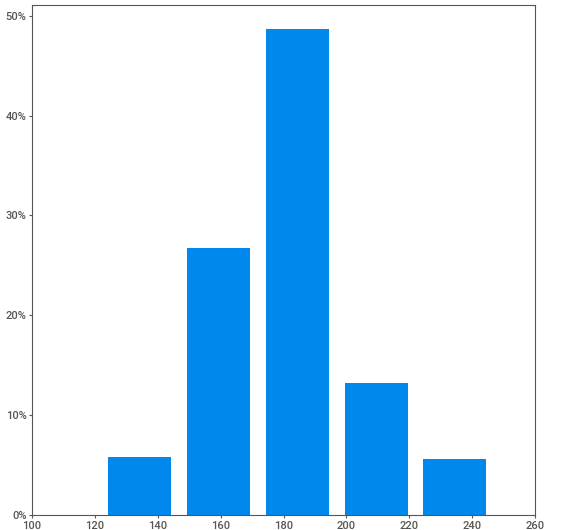
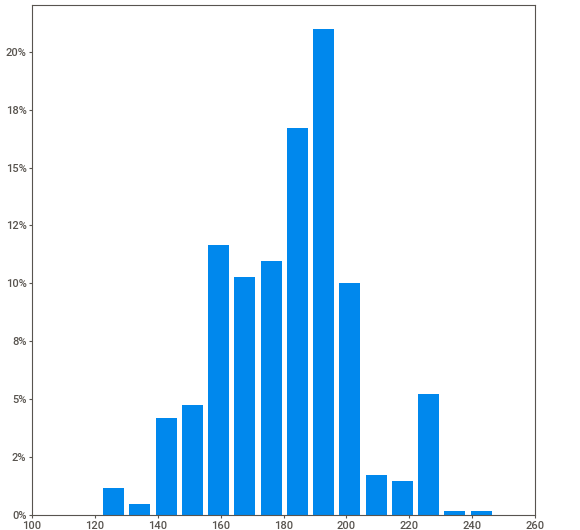
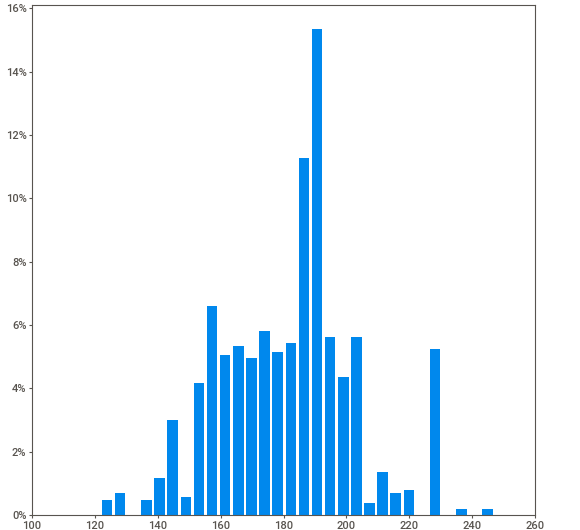
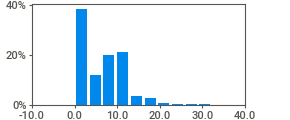
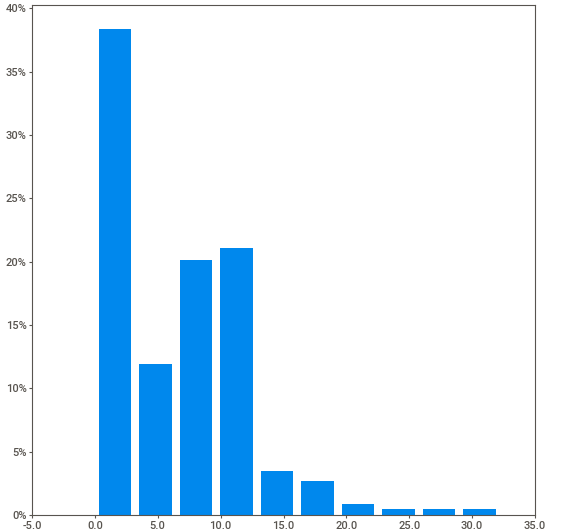
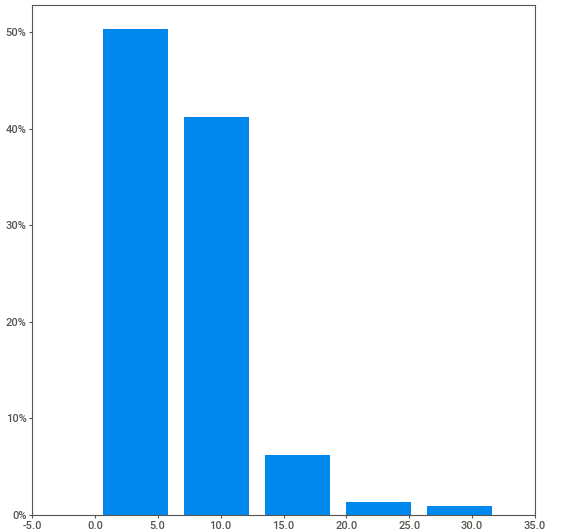
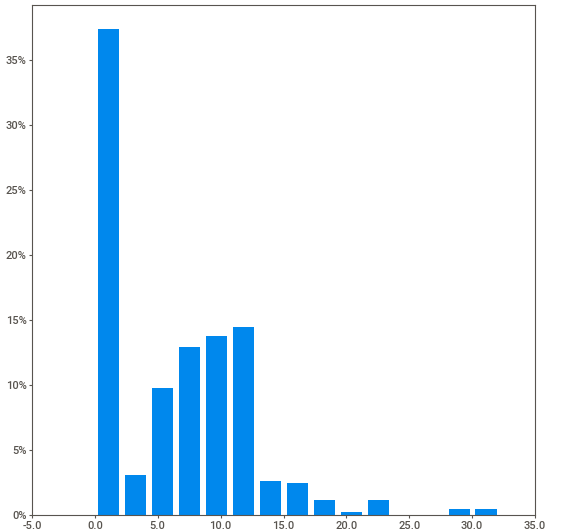
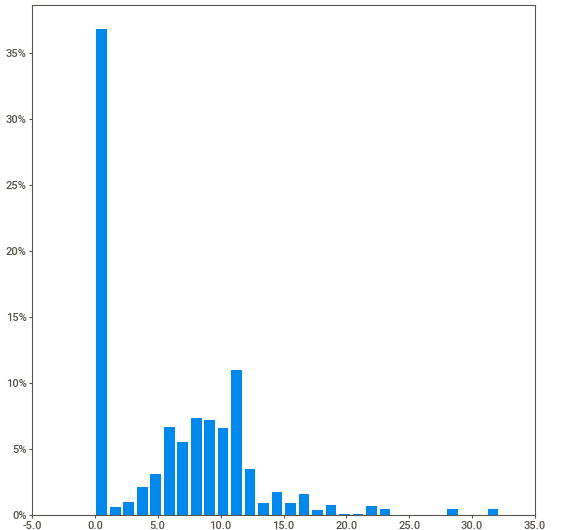
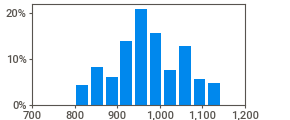
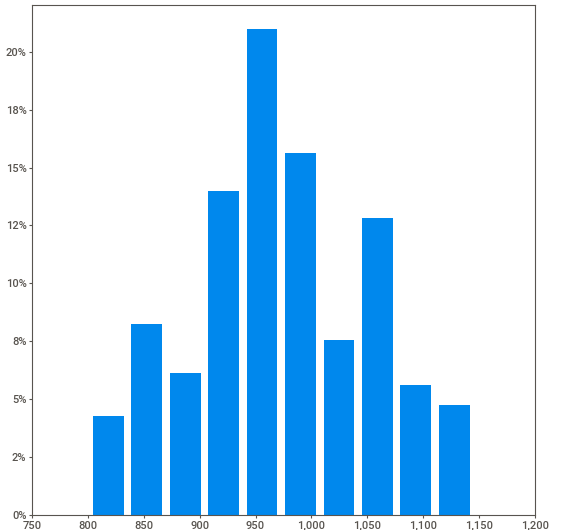
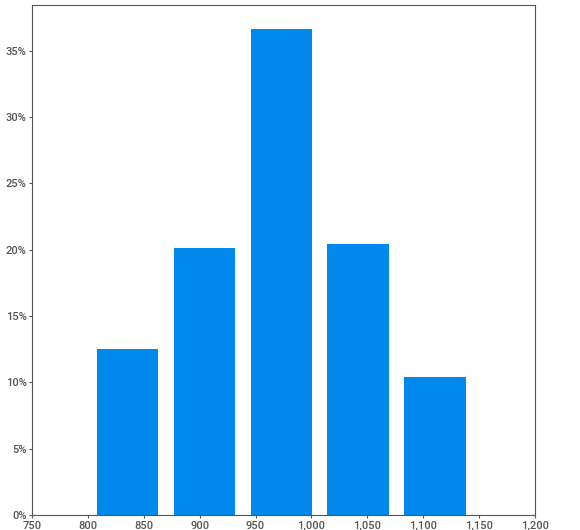
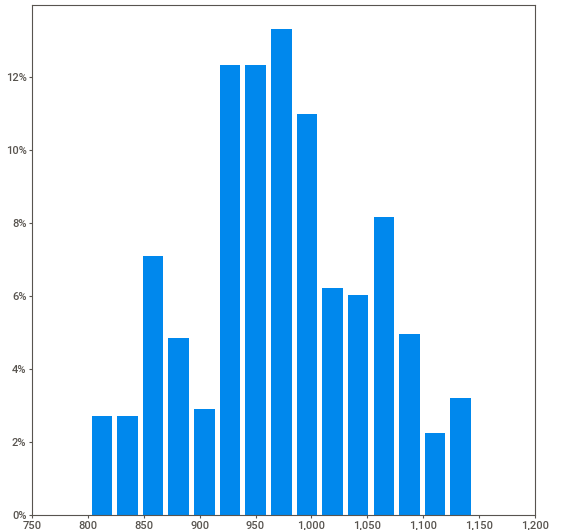
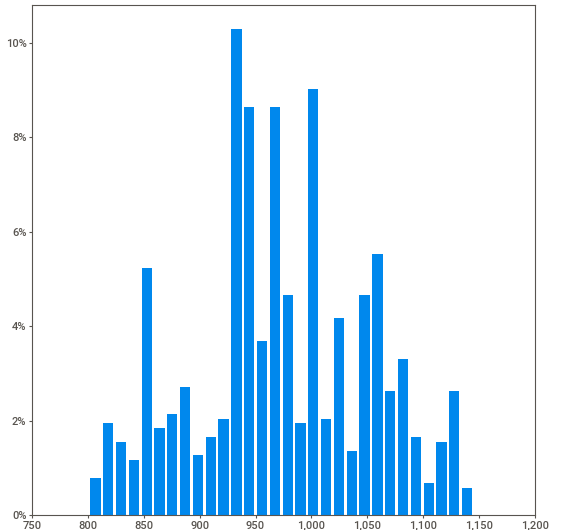
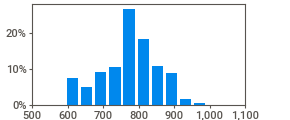
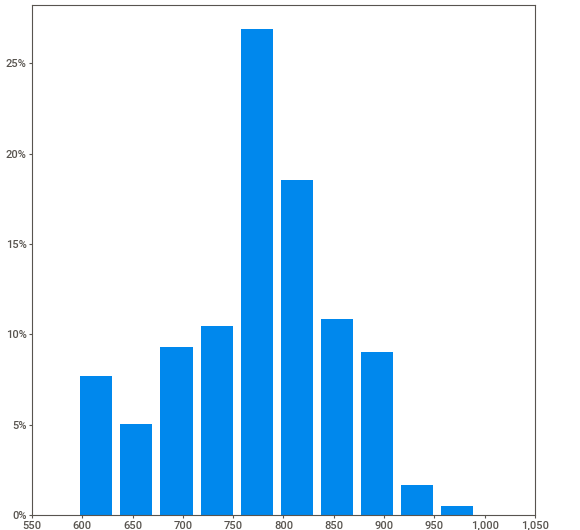
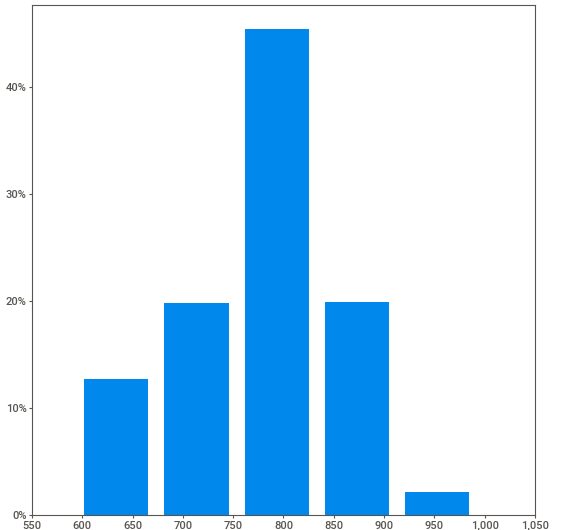
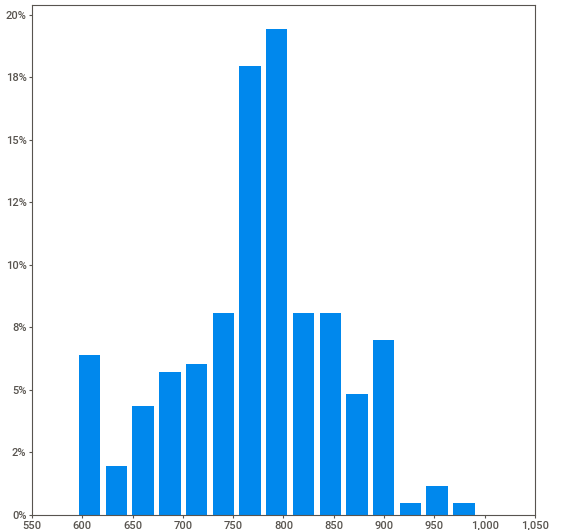
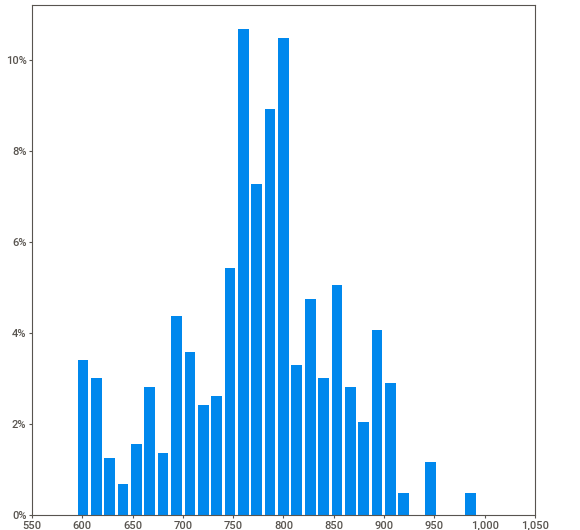
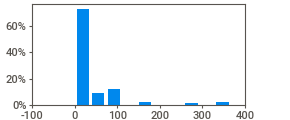
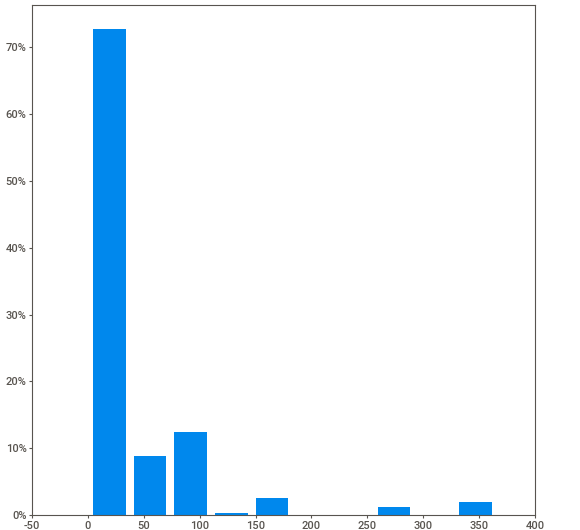
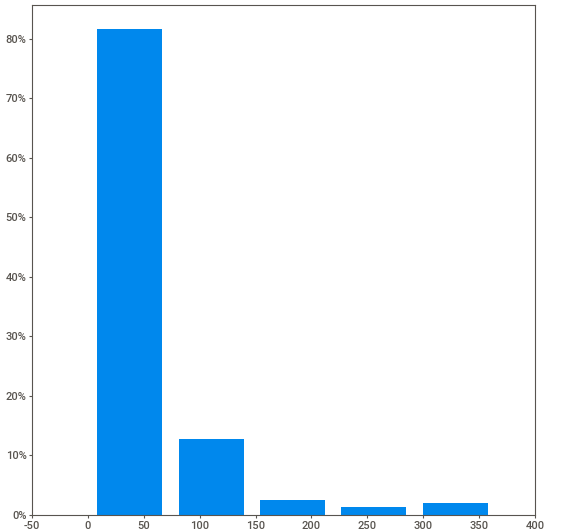
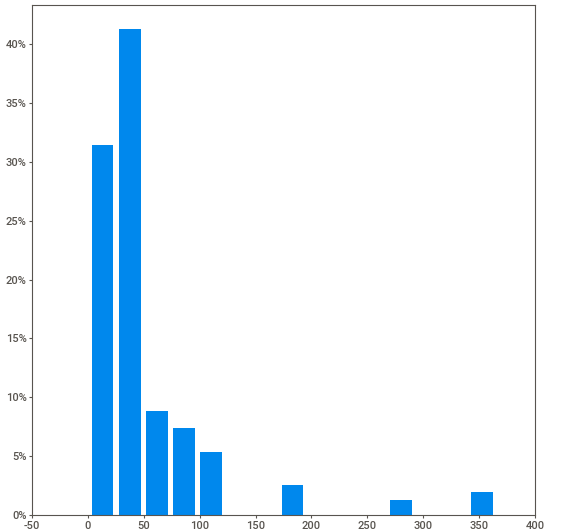
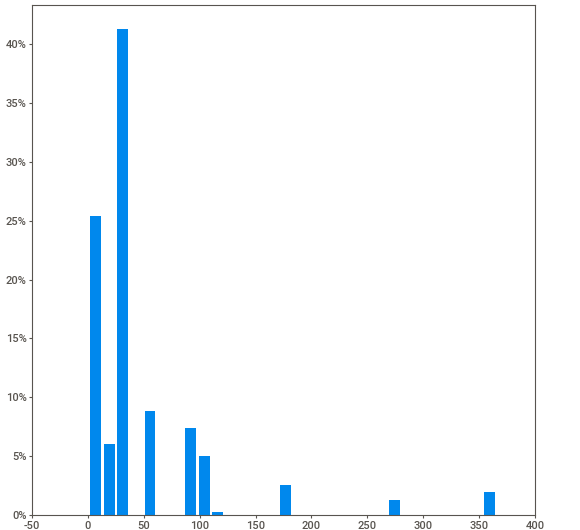
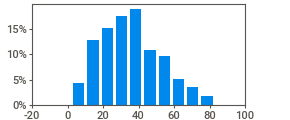
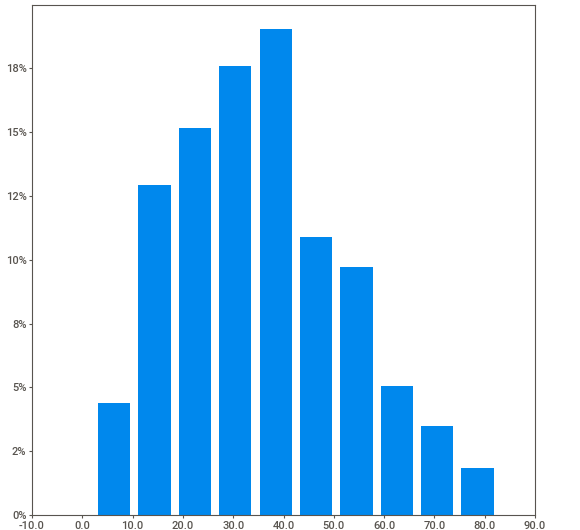
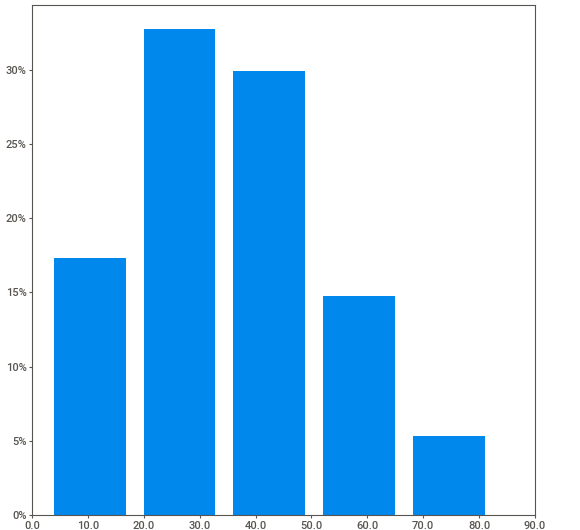
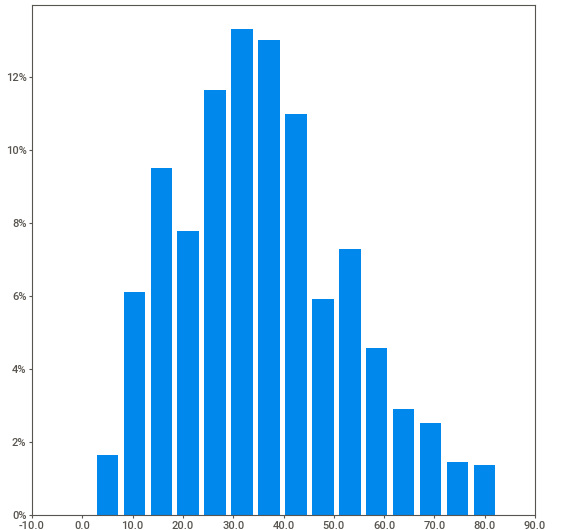
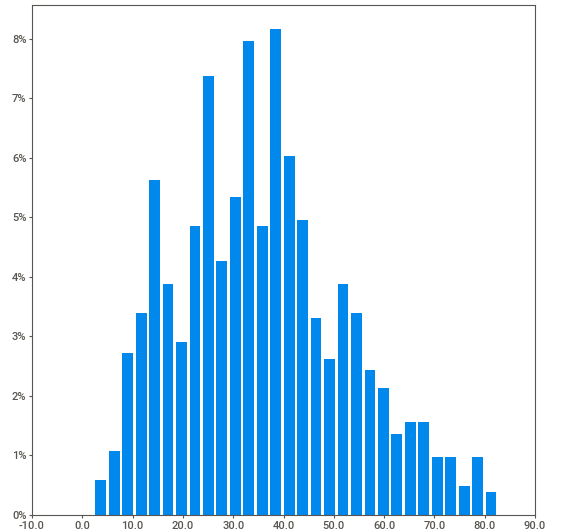
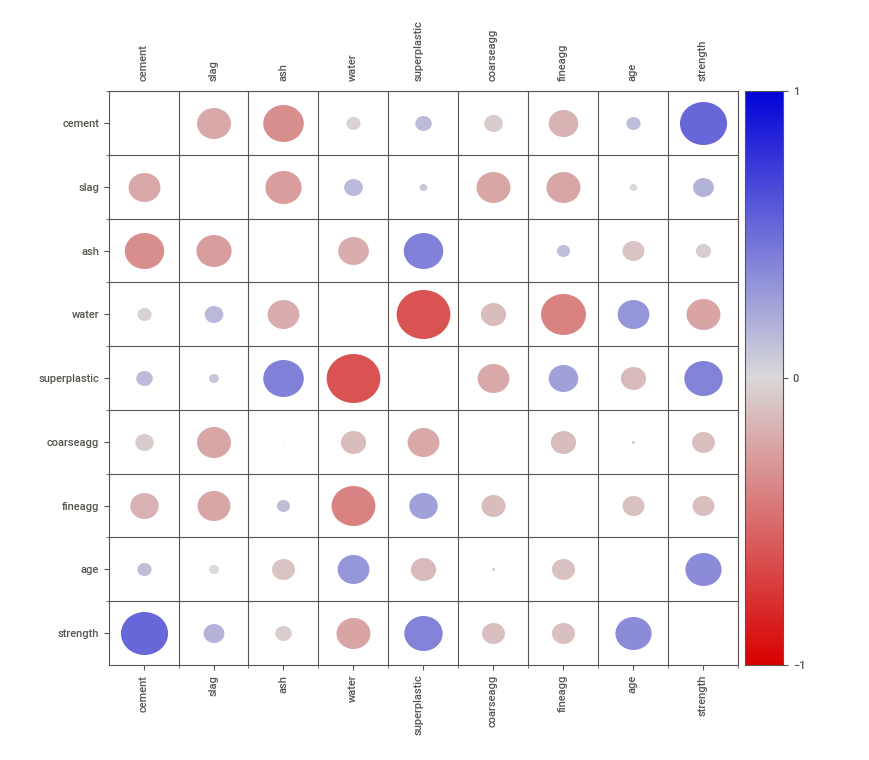
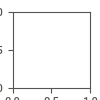

In [87]:
import sweetviz as sv 
my_report = sv.analyze(data)
my_report.show_notebook()

In [88]:
#insights:slag,superplastic and age are  moderatly highly skewed.Age has high kurtosis.

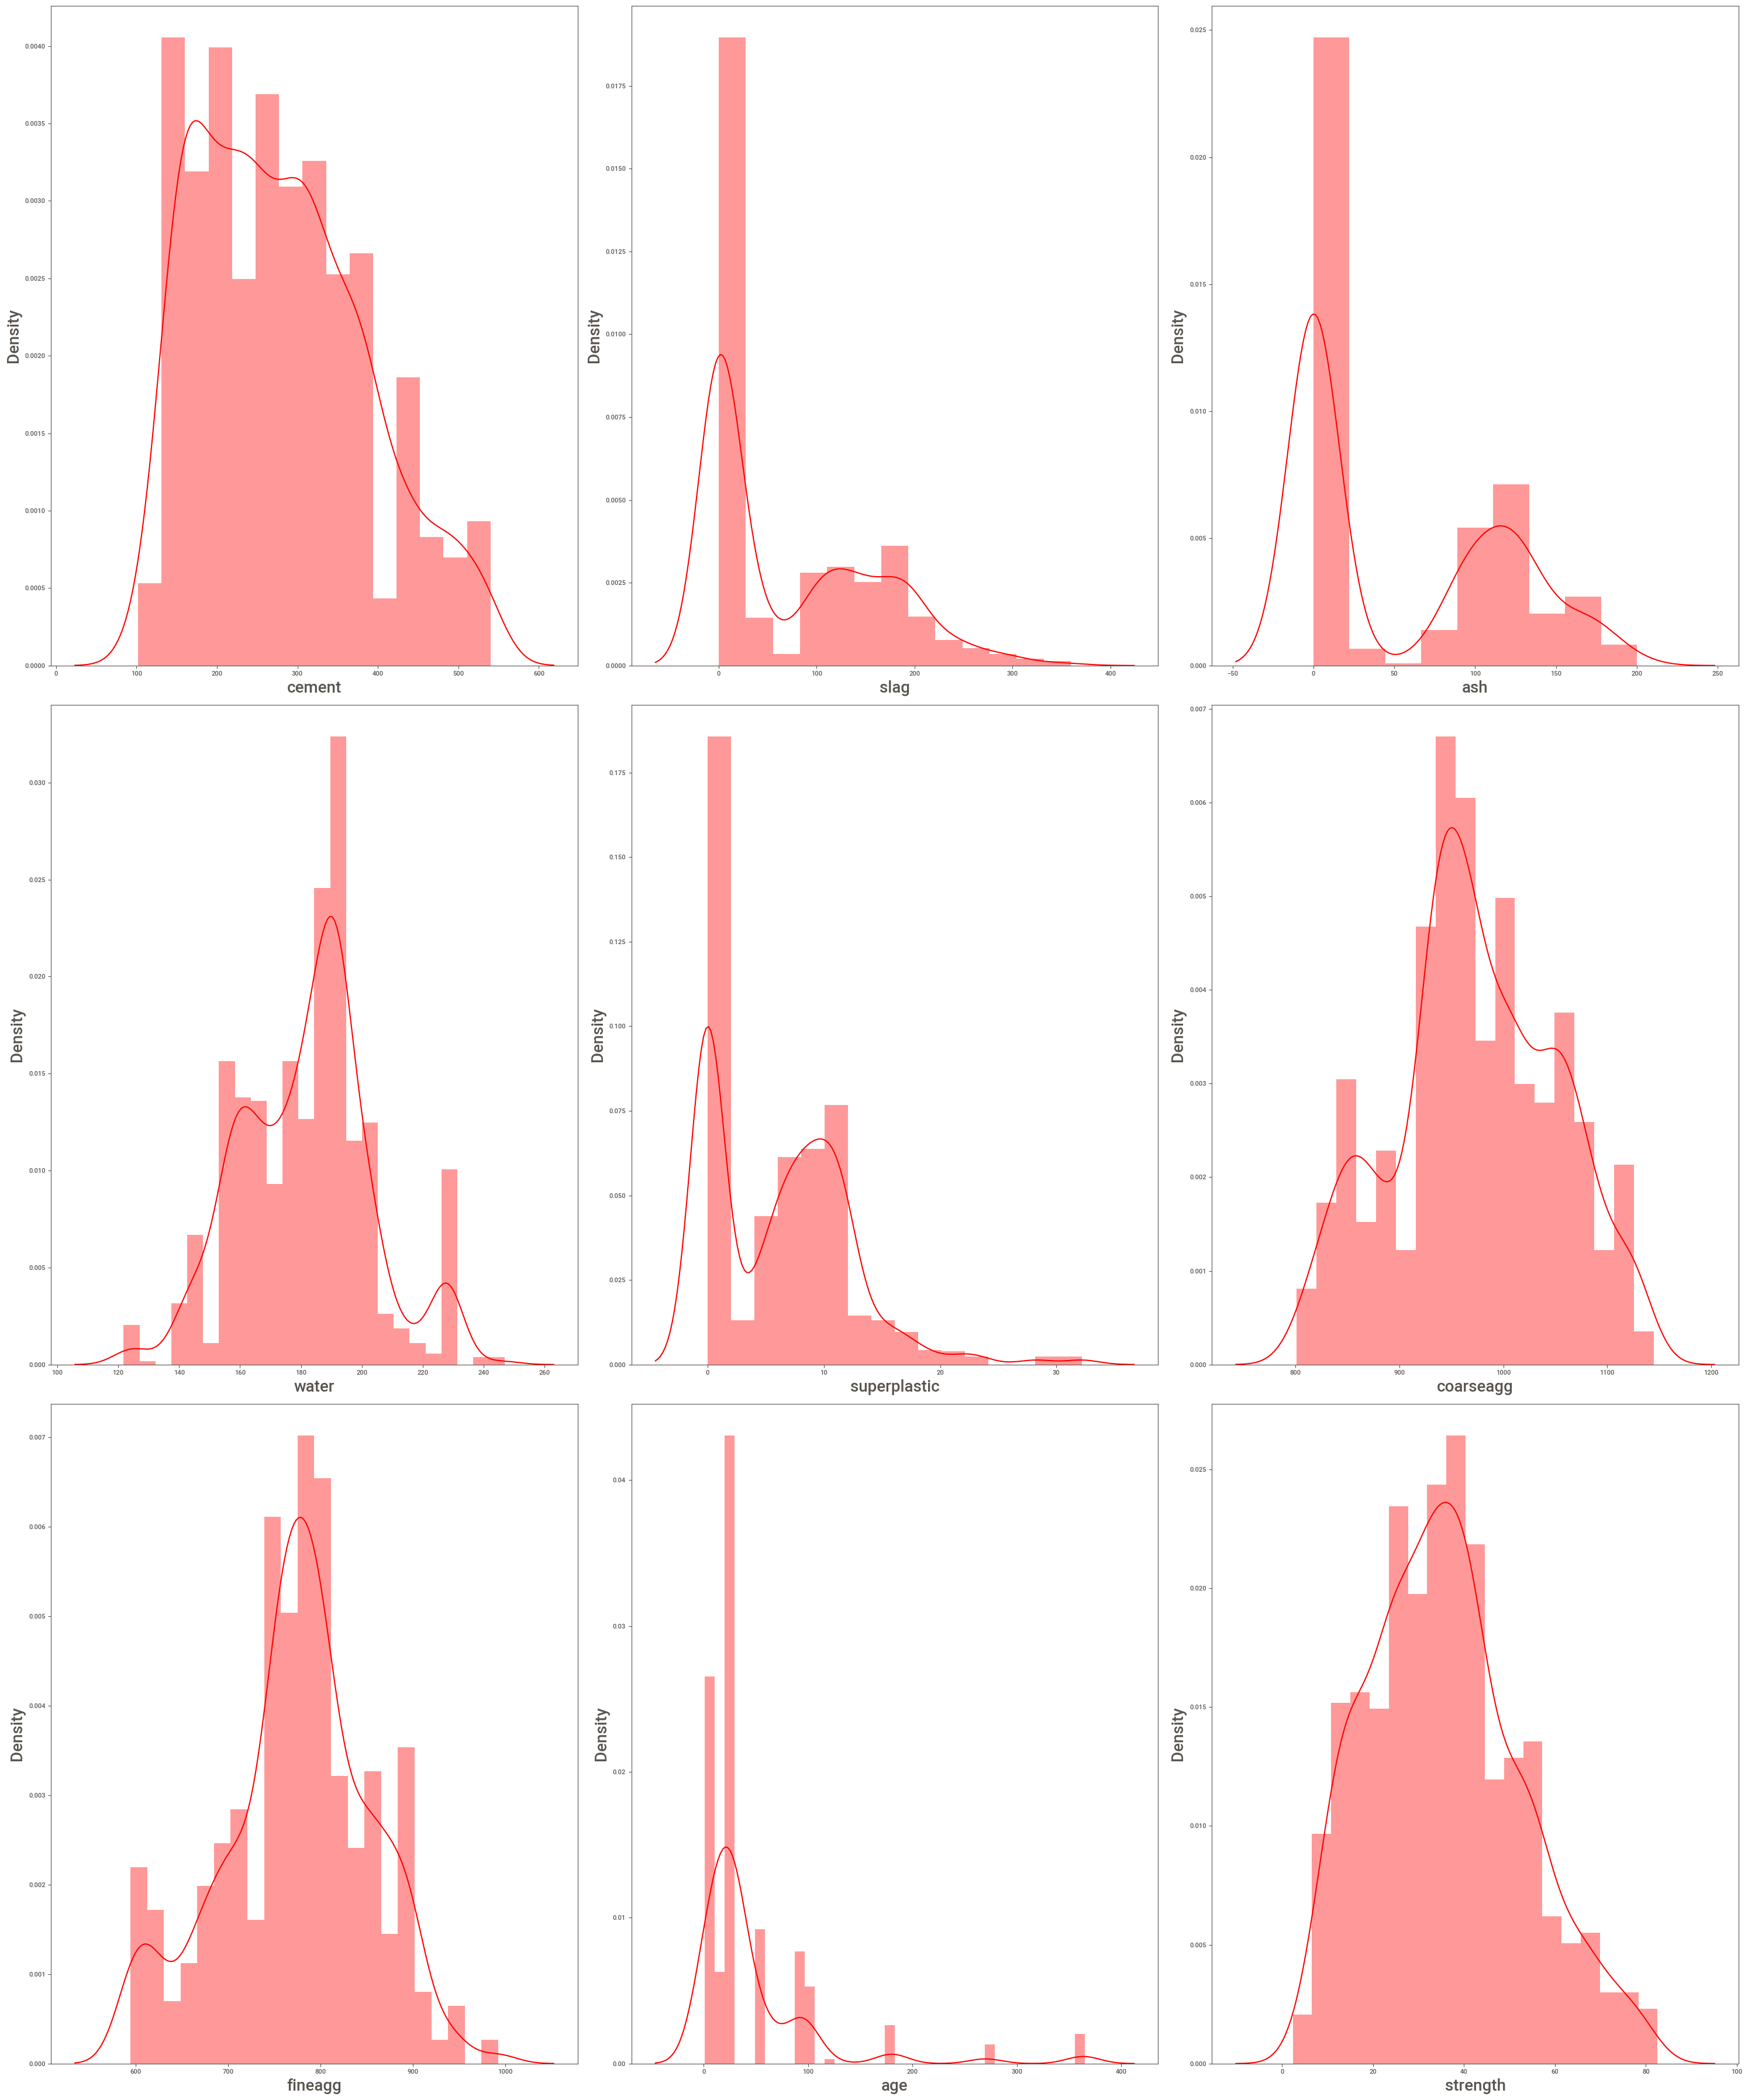

In [89]:
plt.figure(figsize=(30,36), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x=data[column],color="r")
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Density',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [90]:
# insights:slag,ash and superplaster has maximum zero values in their respective columns.

### Bivariate Analysis

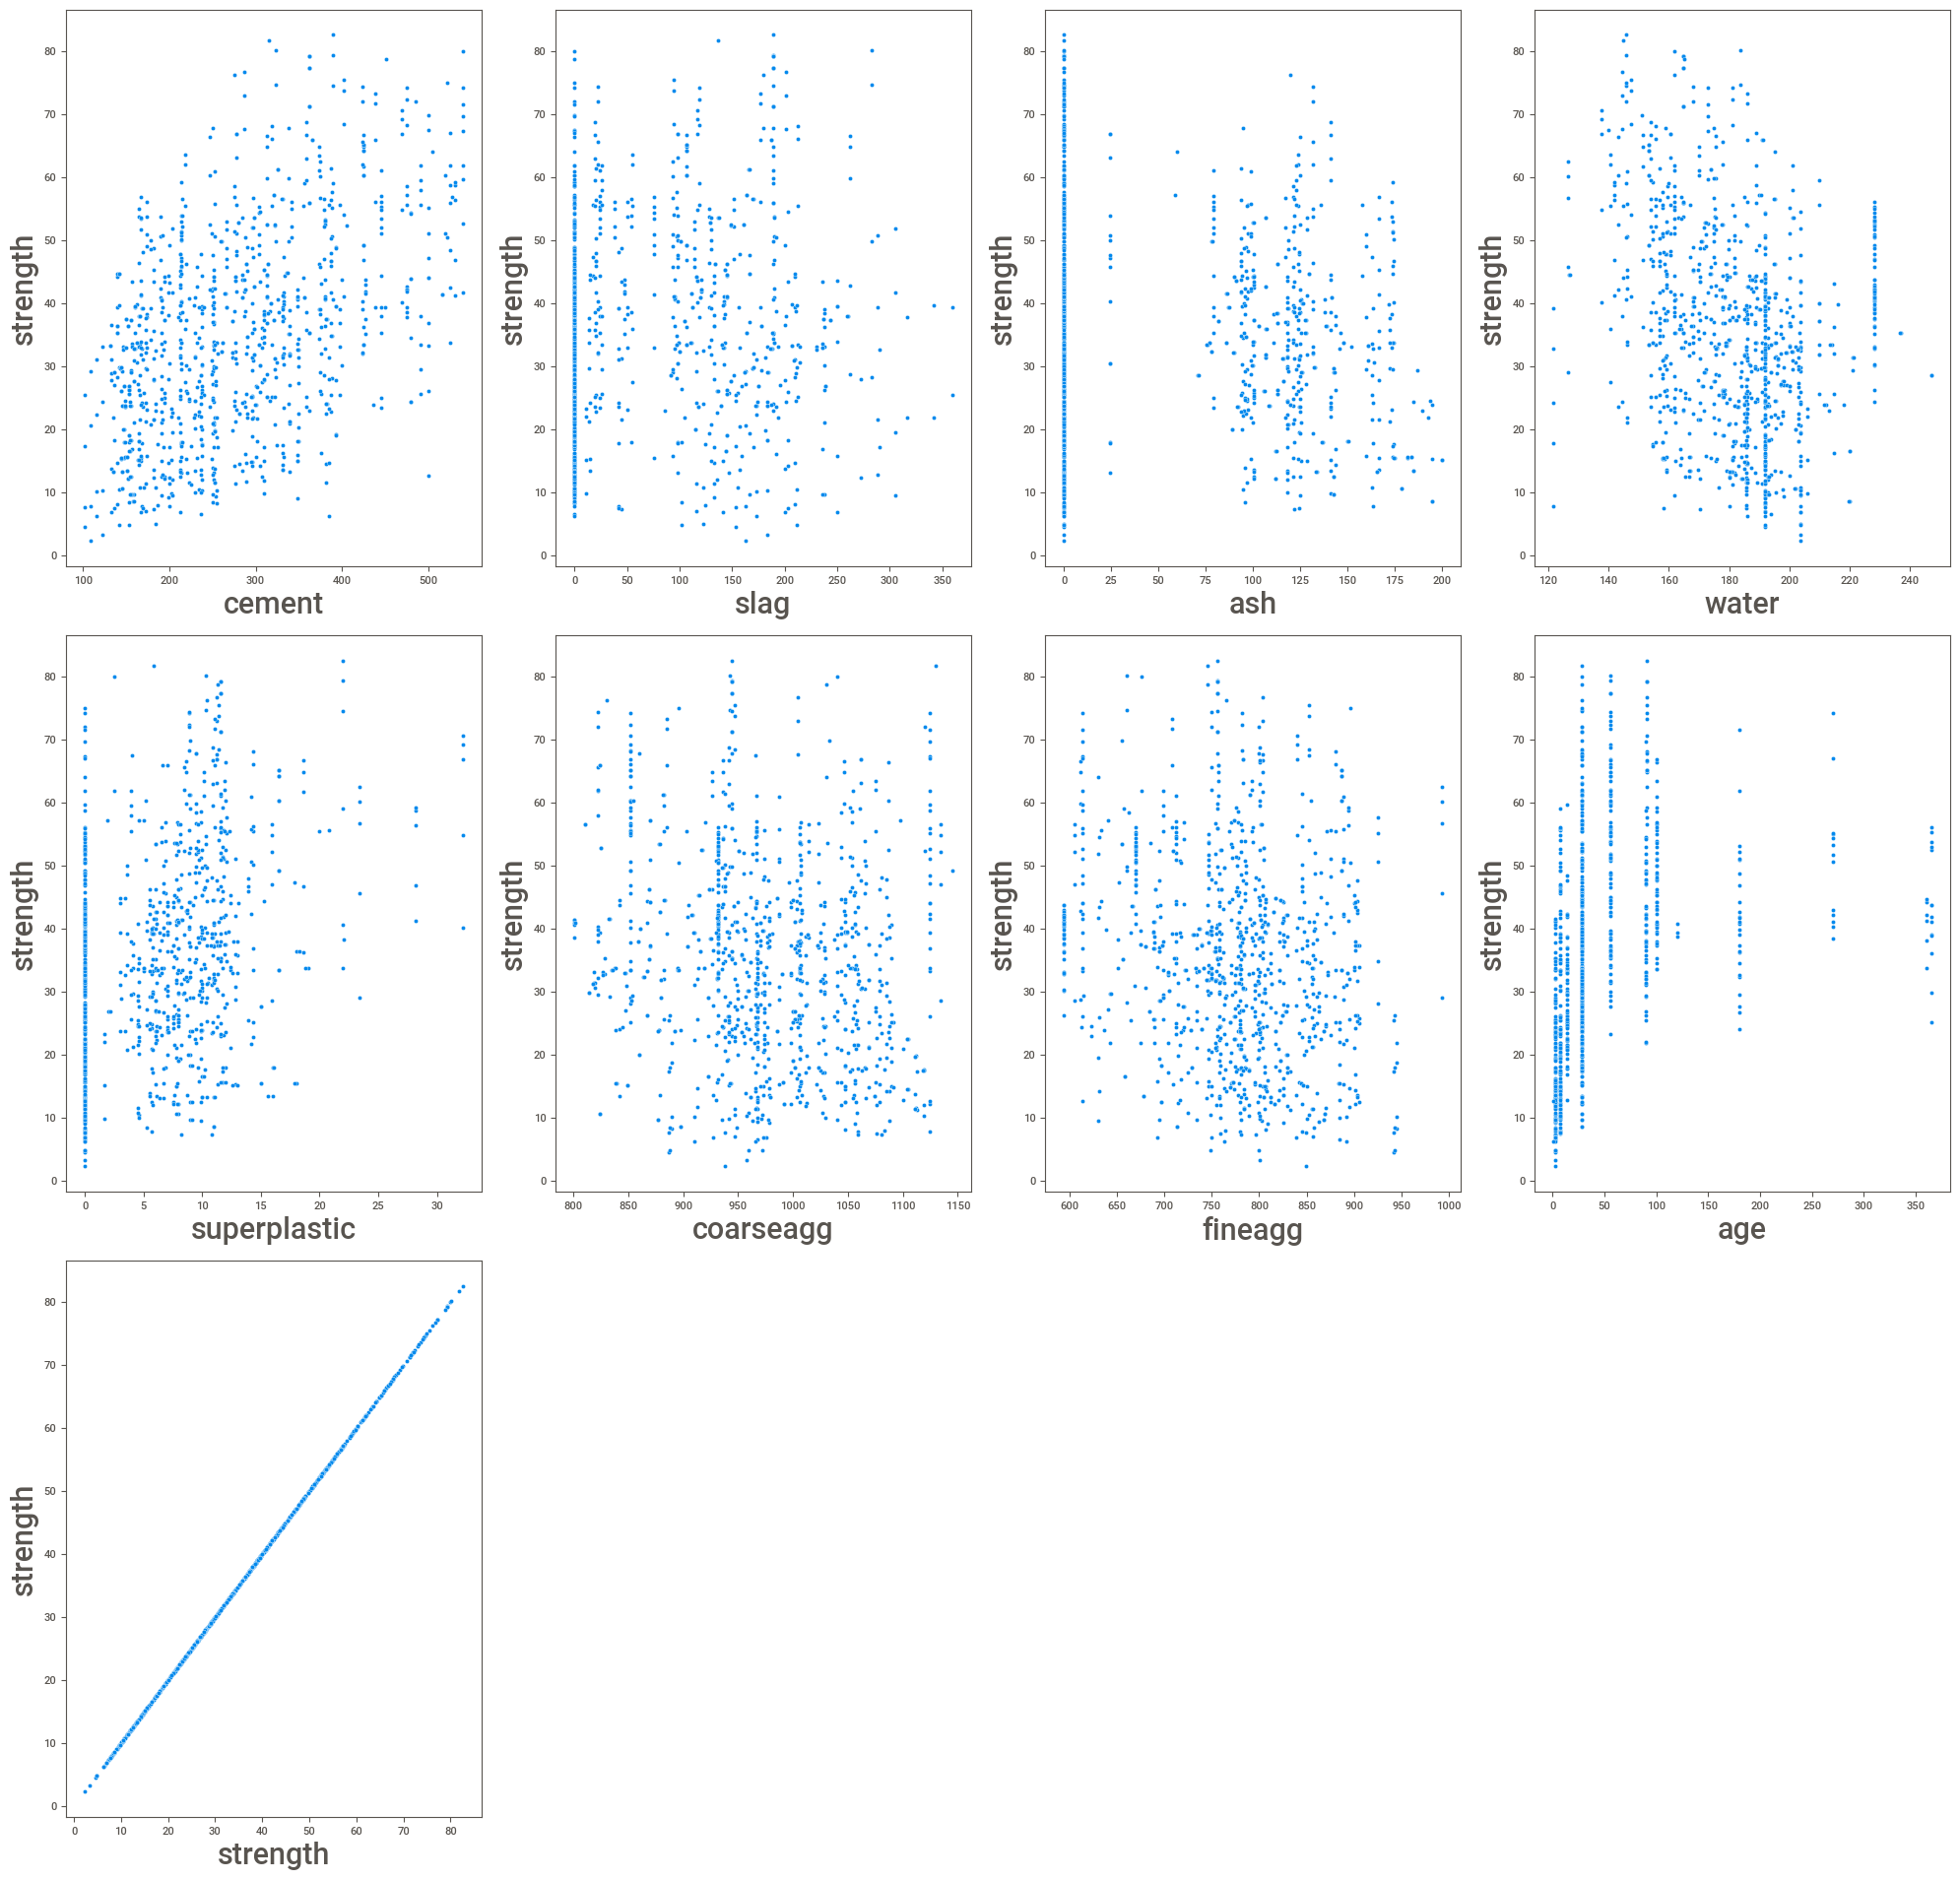

In [91]:
plt.figure(figsize=(20,25), facecolor='white') 
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data[column]
                        ,y=data.strength)
        plt.xlabel(column,fontsize=22)
        plt.ylabel('strength',fontsize=22)
    plotnumber+=1
plt.tight_layout()

In [92]:
#insights:It seems all the variables are  less linearly distributed w.r.t strength

### Multivariate Analysis

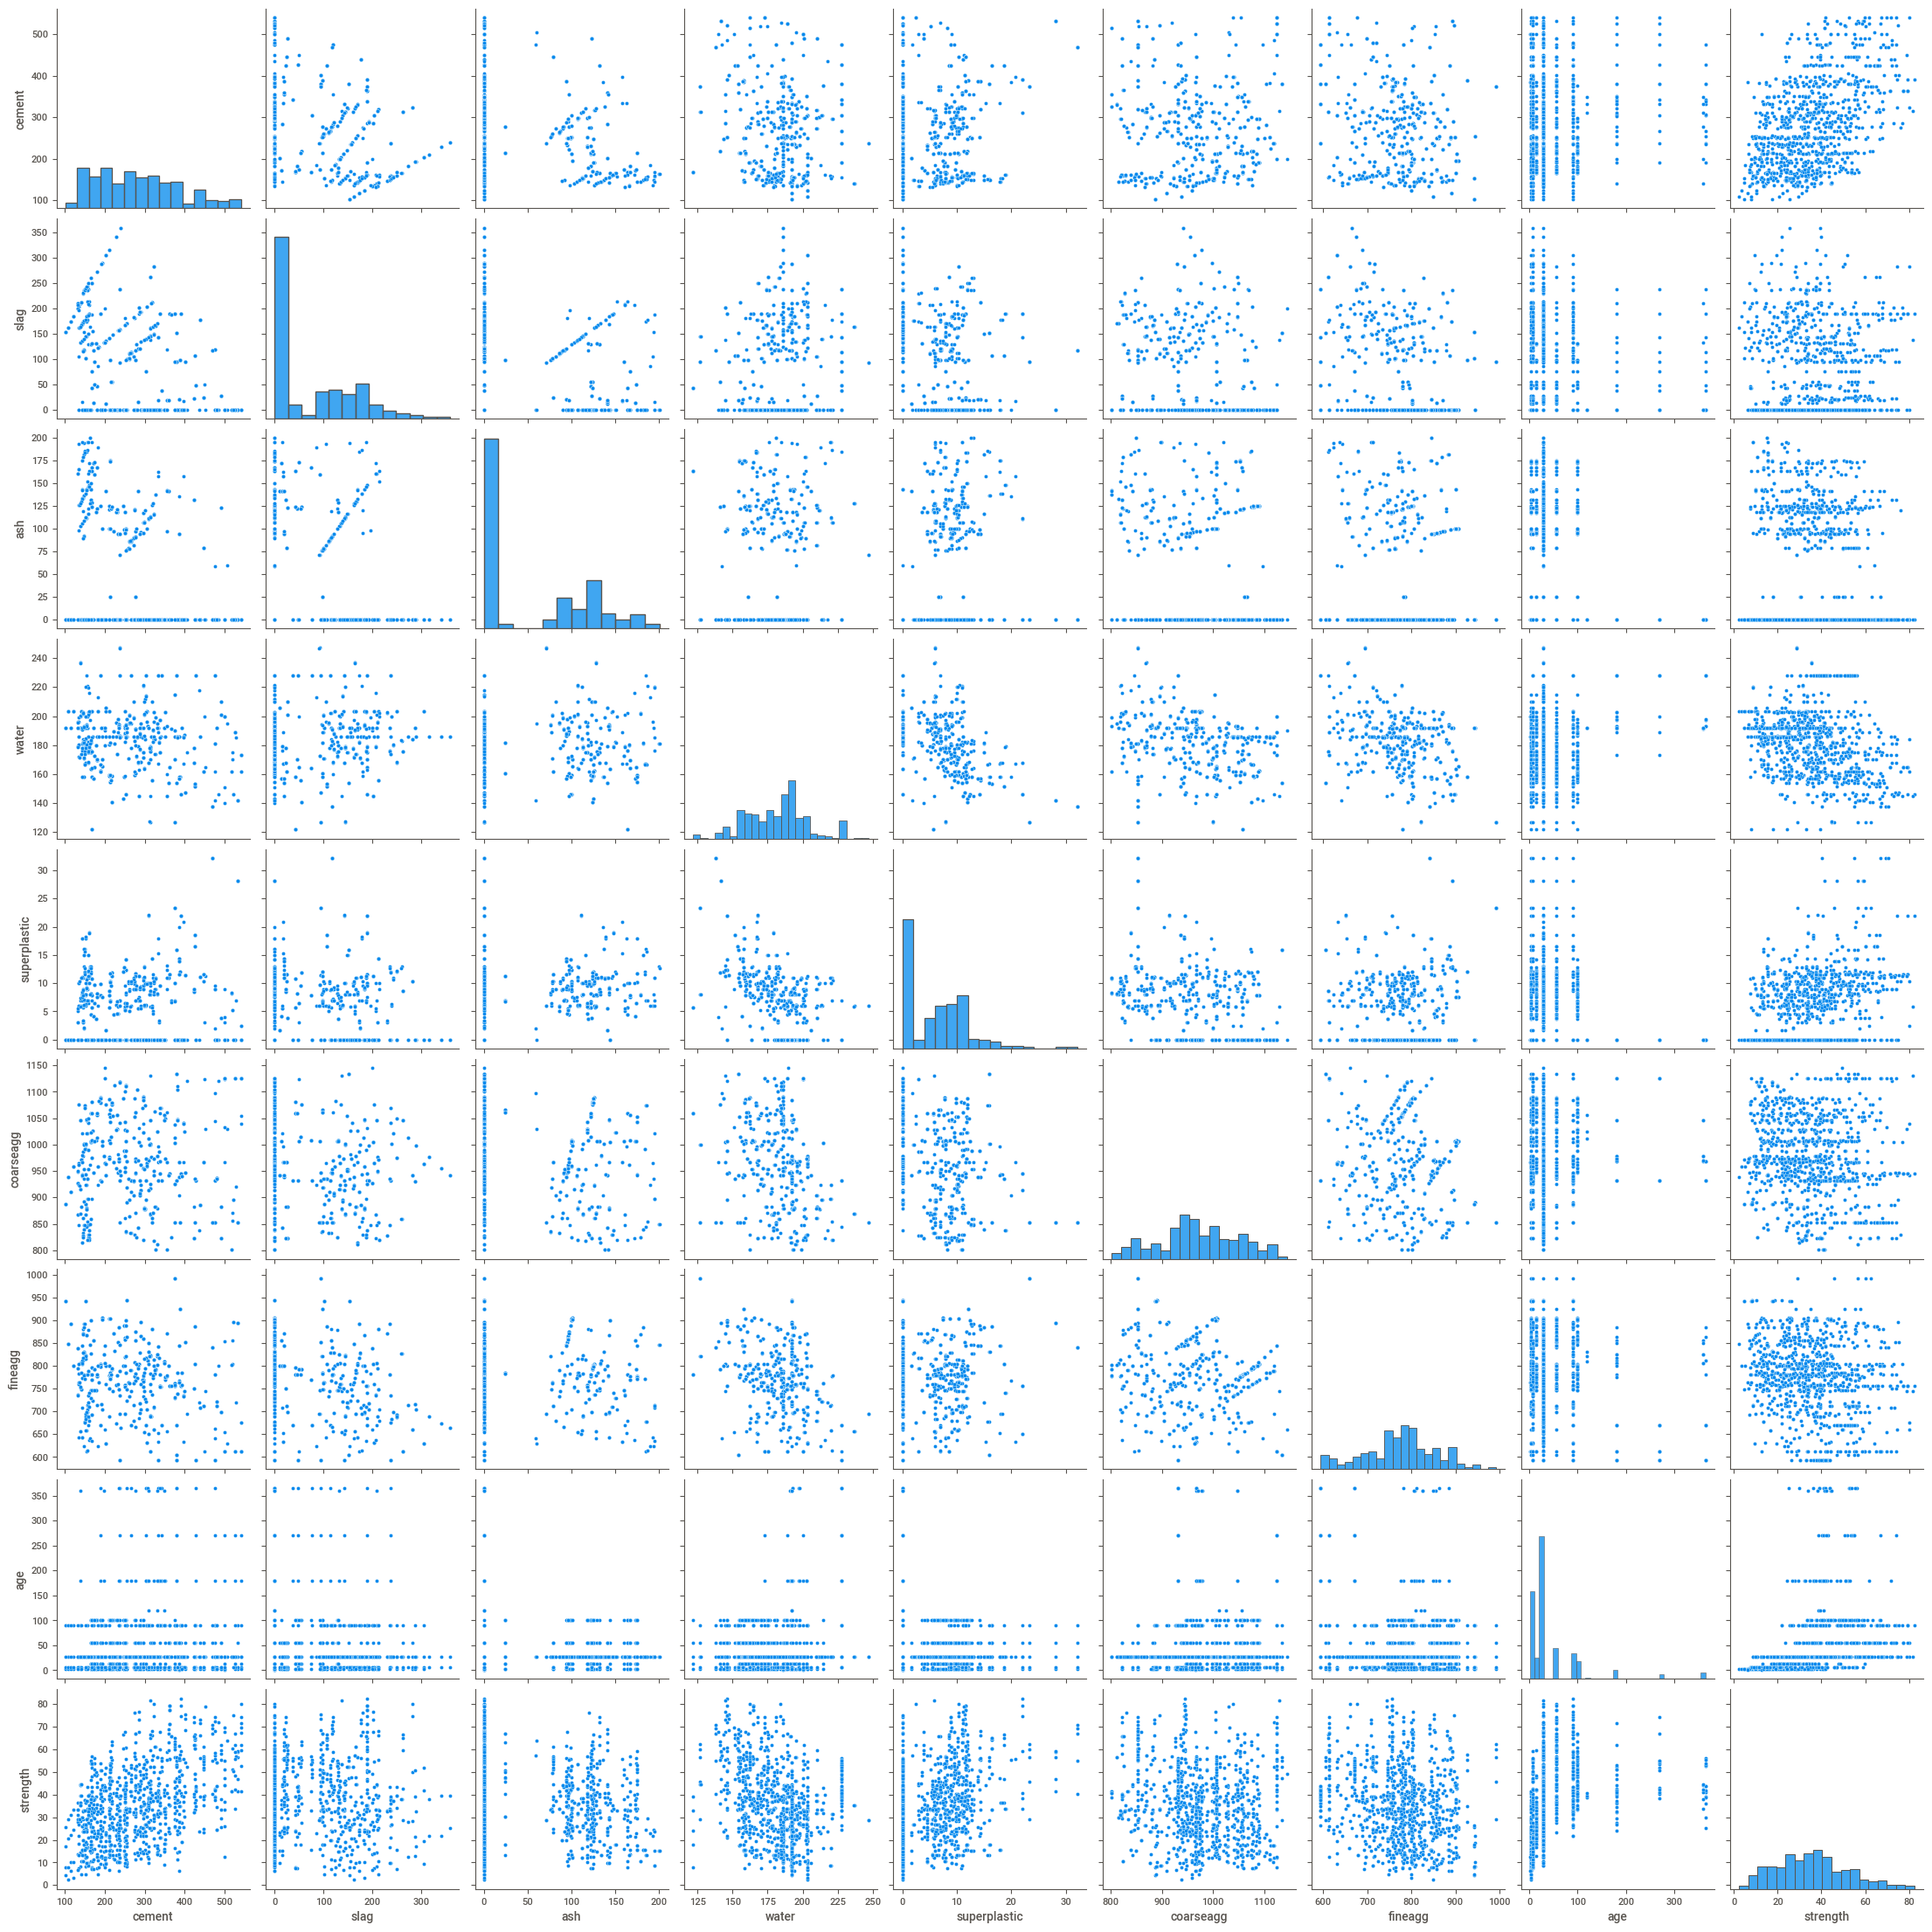

In [93]:
sns.pairplot(data=data)
plt.show()

In [94]:
#insights: It seems less relation between age and strength.it seems strength has +ve correlation with
# cement and _ve coorelation with water

Text(0.5, 1.0, 'Heatmap')

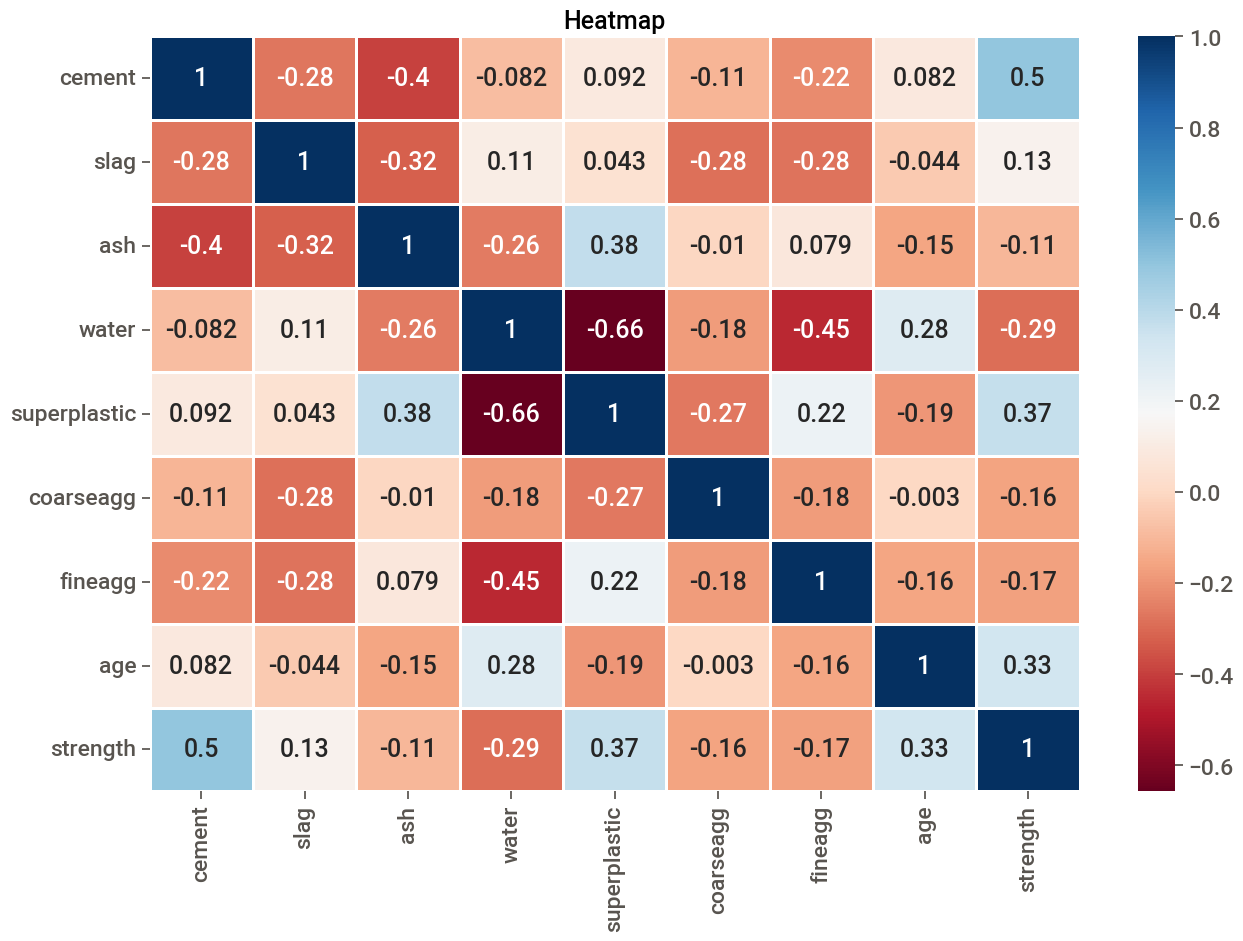

In [95]:
plt.figure(figsize = (15, 10))
sns.set_context('notebook',font_scale=1.5)
sns.heatmap(data.corr(),annot=True ,cmap="RdBu",linewidth=2)
plt.title("Heatmap")

In [96]:
# Insights:Strength has a +ve corelation with cement and-ve correlation with water.Other components are not highly 
#correlated with strength.Superplastic and water are highly _vely correlated.

### Data Preprocessing

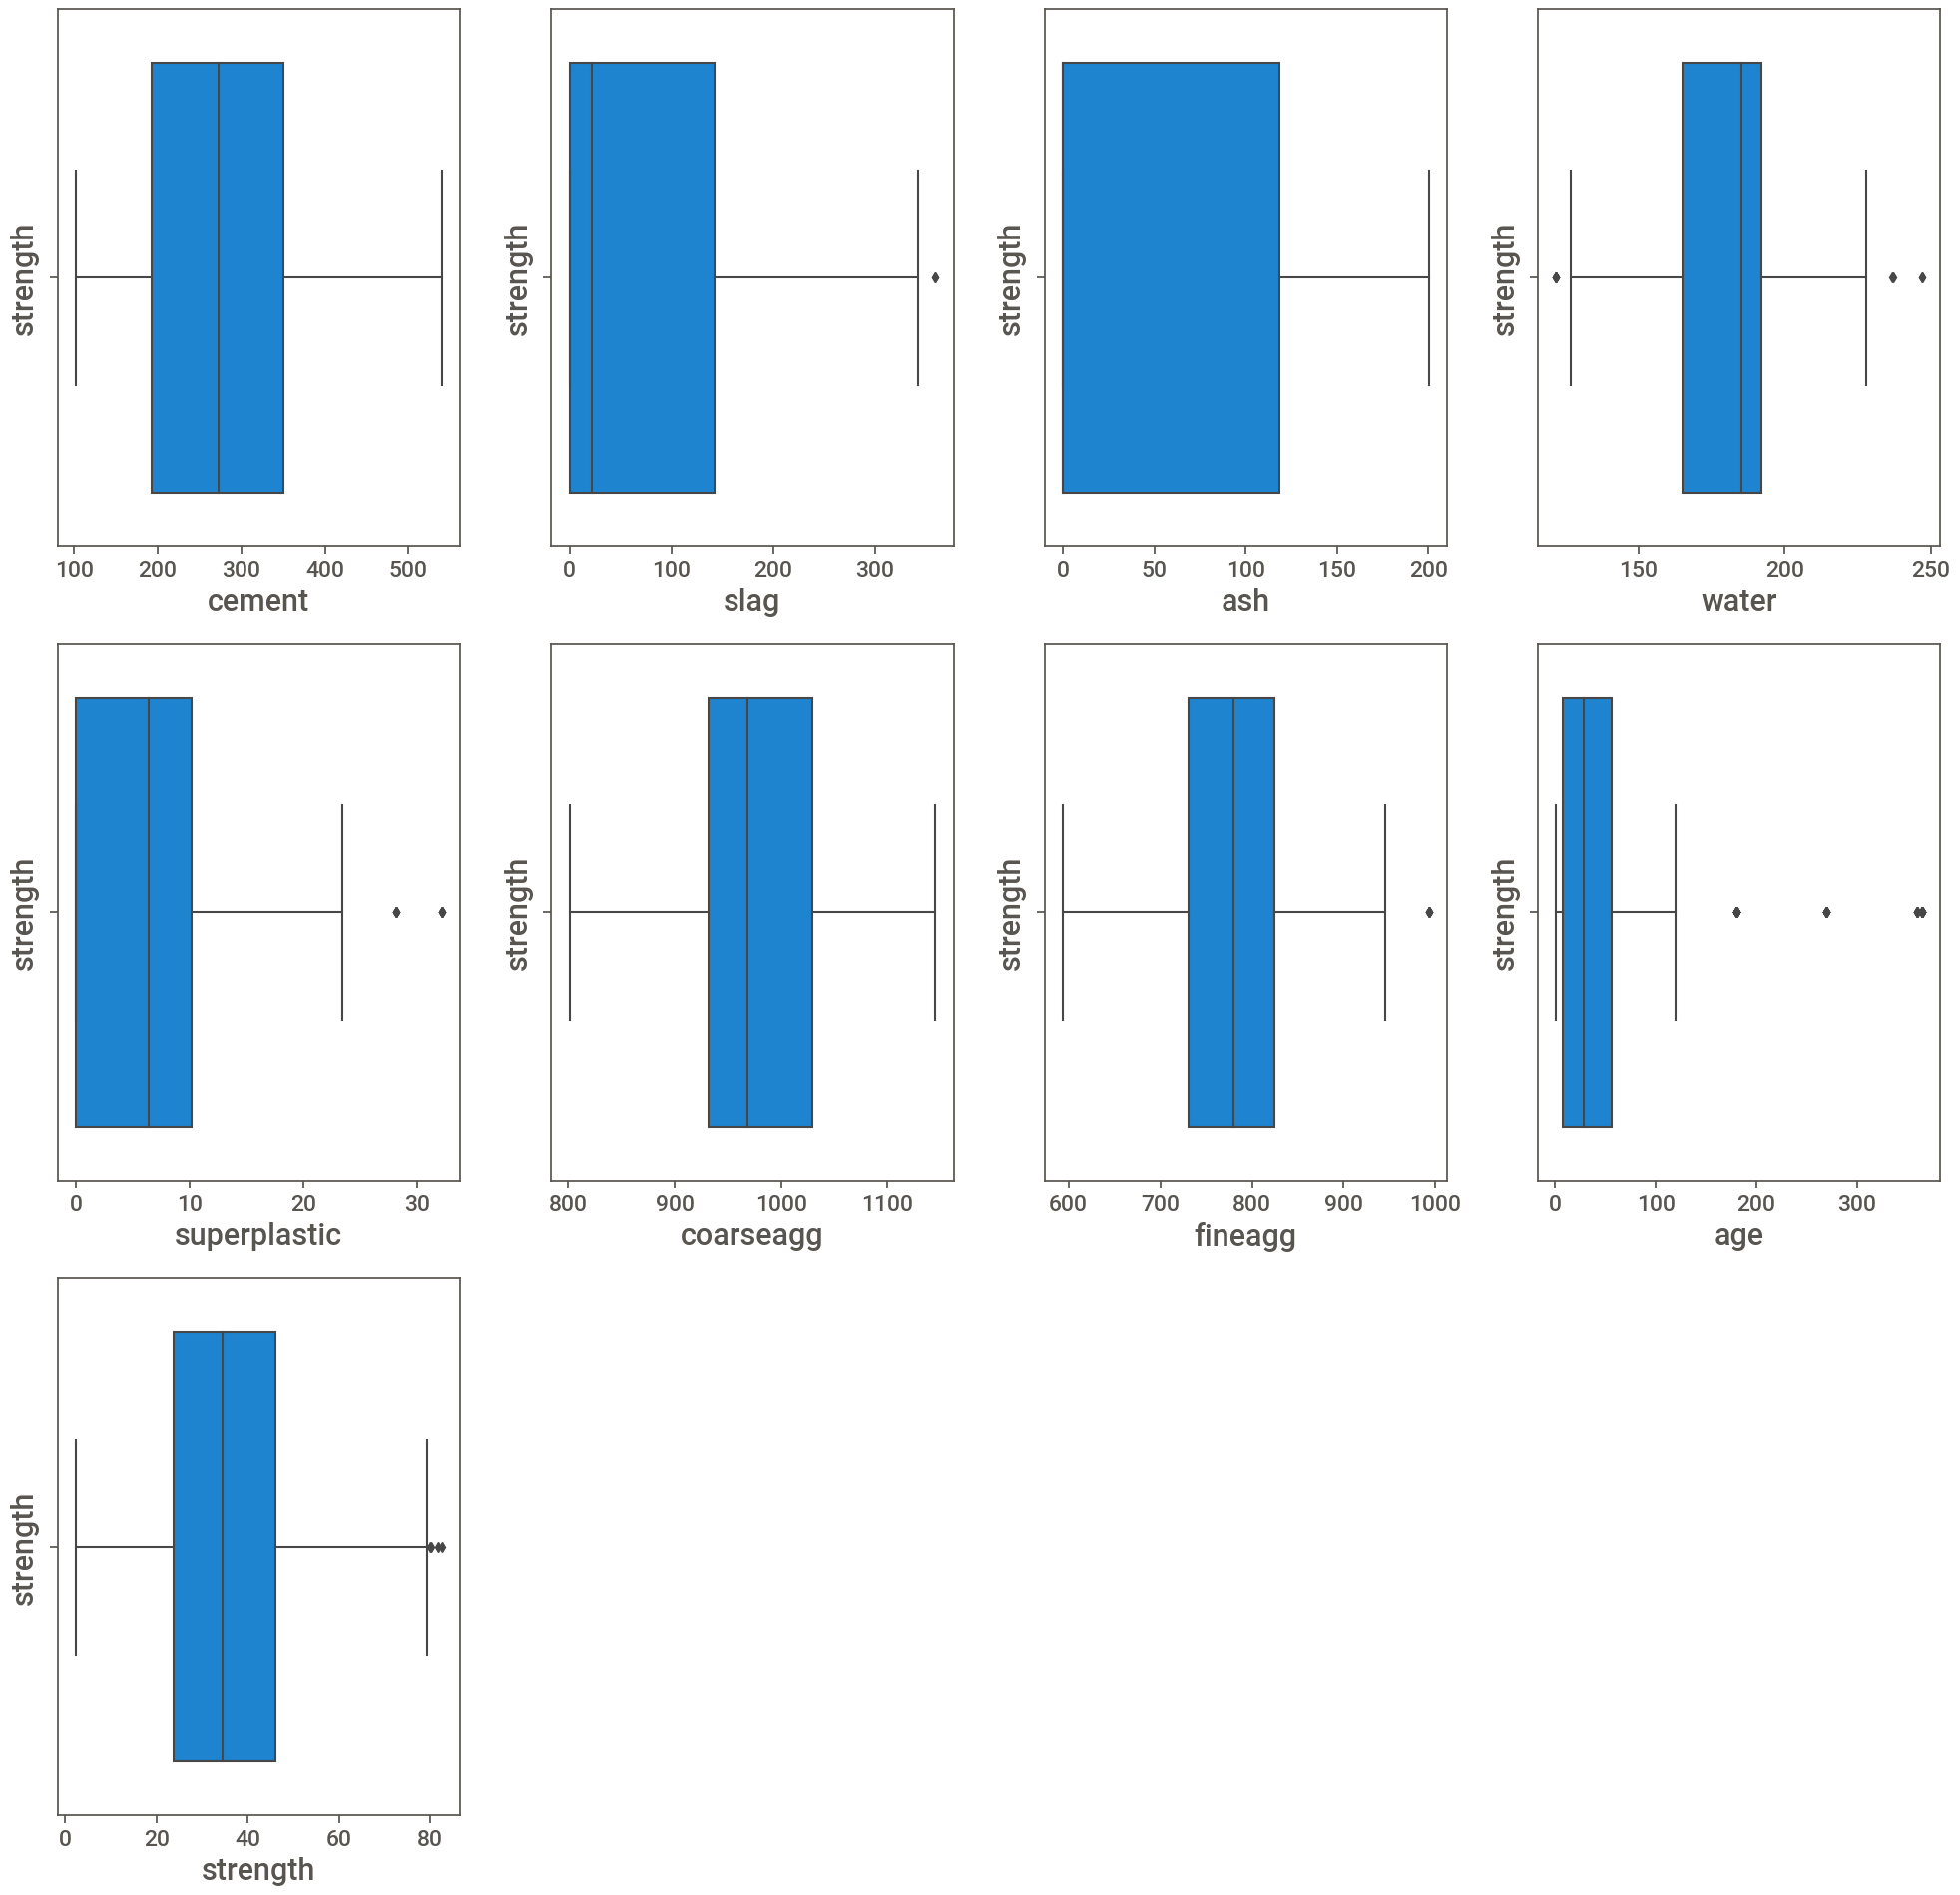

In [97]:
plt.figure(figsize=(20,25), facecolor='white') 
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=22)
        plt.ylabel('strength',fontsize=22)
    plotnumber+=1
plt.tight_layout()

In [98]:
# insights:some outliers are present in water,superplastic.Age has maximum number of outliers
#          very less outliers in slag and fineagg which can be ignored

### Treating outliers

In [99]:
lower_limit1=data.water.mean()-3*data.water.std()
upper_limit1=data.water.mean()+3*data.water.std()

In [100]:
lower_limit1

117.50462585830046

In [101]:
upper_limit1

245.6299372484956

In [102]:
data.loc[data.water>upper_limit1]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63


In [103]:
data.loc[data.water<lower_limit1]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [104]:
data.loc[data['water']>upper_limit1,"water"]=upper_limit1

In [105]:
data.loc[data['water']>upper_limit1]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [106]:
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [107]:
lower_limit2=data.superplastic.mean()-3*data.superplastic.std()
upper_limit2=data.superplastic.mean()+3*data.superplastic.std()

In [108]:
lower_limit2

-11.716863983281762

In [109]:
upper_limit2

24.126184371631275

In [110]:
data.loc[data['superplastic']>upper_limit2]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2


In [111]:
data.loc[data['superplastic']>upper_limit2,"superplastic"]=upper_limit2

In [112]:
data.loc[data['superplastic']>upper_limit2]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [113]:
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [114]:
IQR=stats.iqr(data.age,interpolation='midpoint')
IQR

49.0

In [115]:
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
print(Q1)
print(Q3)

7.0
56.0


In [116]:
print(min_limit)
print(max_limit)

-66.5
129.5


In [117]:
data.loc[data.age>max_limit]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52


In [118]:
data.loc[data.age>max_limit,"age"]=max_limit

In [119]:
data.loc[data.age>max_limit]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [120]:
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


### Feature Selection and Scaling

In [121]:
X= data.drop('strength',axis=1)
y=data.strength

In [122]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.28157186],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.28157186],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  2.55640645],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.28157186],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.28157186],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.28157186]])

### Model creation

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size = 0.25,random_state = 42)


In [124]:
LR = LinearRegression() 
LR.fit(X_train,y_train) 
LR_pred=LR.predict(X_test) 
LR_score=r2_score(y_test,LR_pred)
LR_score

0.7352692802644569

In [125]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred= knn.predict(X_test)
knn_score = r2_score(y_test, knn_pred)
knn_score


0.760986209541662

In [126]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_test)
rf_score = r2_score(y_test, rf_pred)
rf_score

0.8883817352224158

In [127]:
dt = DecisionTreeRegressor(random_state=0 )
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_score=r2_score(y_test,dt_pred)
dt_score

0.8027482739878451

In [128]:
svregressor = SVR() 
svregressor.fit(X_train, y_train)
sv_pred=svregressor.predict(X_test)
sv_score=r2_score(y_test,sv_pred)
sv_score

0.6974256786650128

In [129]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor() 
gb.fit(X_train,y_train) 
gb_pred=gb.predict(X_test)
gb_score=r2_score(y_test,gb_pred)
print(gb_score)



0.8865209326202786


In [130]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
xgb_score = r2_score(y_test,xgb_pred)
print(xgb_score)

0.9015184483526393


In [131]:
compare = pd.DataFrame({'Model': ['Linear Regression', 'Knn',  'SVR',  'Decision Tree', 'Random Forest', 'Gradient boosting',"XGBRegressor"], 
                        'r2_score': [LR_score*100,knn_score*100,sv_score*100,  dt_score*100,  rf_score*100,gb_score*100,xgb_score*100]})
compare.sort_values(by='r2_score',ascending=False)

,Model,r2_score
6,XGBRegressor,90.151845
4,Random Forest,88.838174
5,Gradient boosting,88.652093
3,Decision Tree,80.274827
1,Knn,76.098621
0,Linear Regression,73.526928
2,SVR,69.742568


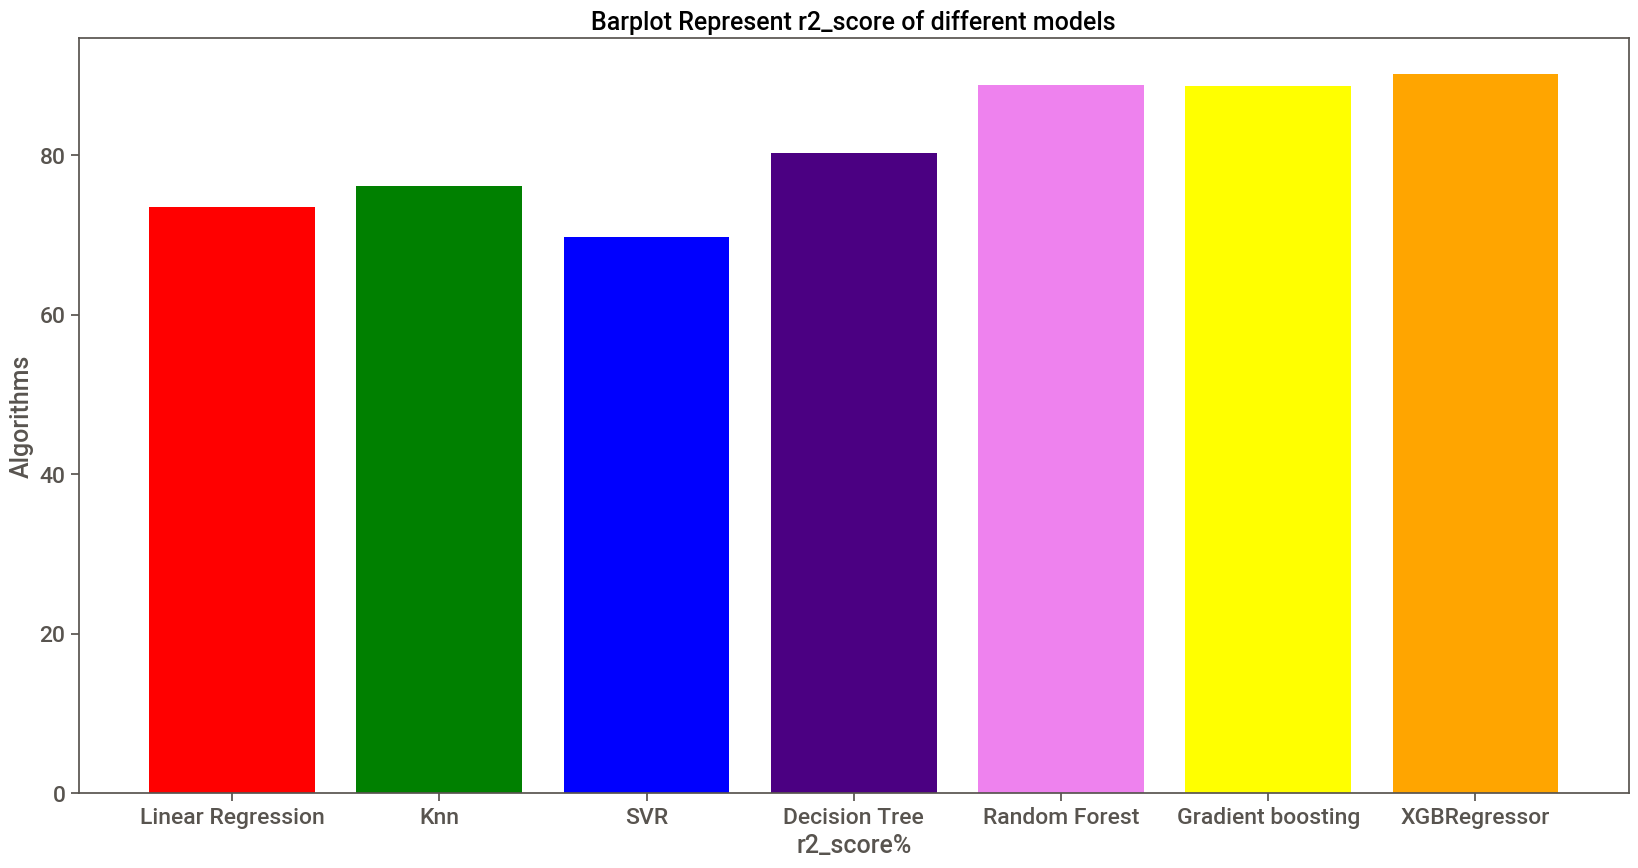

<Figure size 600x400 with 0 Axes>

In [132]:
colors = ['red','green','blue','indigo','violet','yellow','orange',]
plt.figure(figsize=(20,10))
plt.title("Barplot Represent r2_score of different models")
plt.xlabel("r2_score%")
plt.ylabel("Algorithms")
plt.bar(compare['Model'],compare['r2_score'],color = colors)
plt.show()
plt.tight_layout()

In [133]:
# insights: It is observed that XGB is giving best r2 score

### Using Bagging on XGB

In [134]:
from sklearn.ensemble import BaggingRegressor

model_bagg=BaggingRegressor(base_estimator=xgb,n_estimators=50)

model_bagg.fit(X_train,y_train)

bagg_pred=model_bagg.predict(X_test)

In [135]:
xgb_bagg_score=r2_score(y_test,bagg_pred)
xgb_bagg_mae = mean_absolute_error(y_test,bagg_pred)
xgb_bagg_mse = mean_squared_error(y_test,bagg_pred)
xgb_bagg_rmse = math.sqrt(xgb_bagg_mse)

In [136]:
print(xgb_bagg_score)
print(xgb_bagg_mae)
print(xgb_bagg_mse)
print(xgb_bagg_rmse)

0.9196973735728671
3.2002798166201094
21.751684483040442
4.663870118586113


### Conclusion

###  XGBRegressor gives best r2 score among other models. After applying boosting on XGB regressor, r2 score further improved.
###  After bagging it has achieved MAE of 3.2 and RMSE 4.6 and r2 score 0.919
### Tried Hyper Parameter Tuning on  XG Boost as well in which the accuracy is not that much changing.